<a href="https://colab.research.google.com/github/Artemis601/ML/blob/master/House_Prices_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)
# **Introduction**:

In this notebook, we will predict house sales prices and practice machine learning techniques using the kaggle [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

**Goal**:

Our objective is to develop a model that can predict the sales price of each house. For each Id in the test set, we predict the value of the Sale Price Variable. 

It is a supervised regression task. The Machine Learning workflow will be as follows: 
1. Data Cleaning and Formatting
2. Exploratory Data Analysis
3. Feature Selection and Engineering
4. Establish a baseline and compare several models on a performance metric
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the testing set
7. Interpret the model results to the full extent possible
8. Draw conclusions and write a well documented report

**Evaluation Metric**:

Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

 # **Imports**:

In [0]:
# Imports
# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np
# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

# set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_style('ticks')

# internal python tool for setting figure size
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# **Data Cleaning and Formatting**
## Load dataset

In [3]:
import os
os.getcwd()

'/Users/kavyaannapareddy'

In [4]:
path= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/train.csv'
house_data = pd.read_csv(path, index_col= 'Id')
house= house_data.copy()
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

What do the columns mean?

Data fields

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


In [5]:
house.shape

(1460, 80)

There are 80 features of which Sale Price is our target variable and 1460 rows of training data. 


# Missing Values

Since the number of features are very high, we draw a table with count of missing values and their % of the total values.

In [6]:
# Create a function to calculate Missing values table
def missing_value(df):
  # missing values by column
  missing_val= df.isnull().sum()
  # % of missing values
  missing_val_percent = missing_val * 100/ len(df)
  # creating a table with values and percentage amounts
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename= missing_val_table.rename(columns= {0:'missing values count', 1:'% of missing values'})
  missing_val_table_rename_sort= missing_val_table_rename[missing_val_table_rename.iloc[:,0]!=0].sort_values(by='missing values count', ascending=False).round(1)
  print('Your dataframe has {} columns of which {} contain missing values'.format(df.shape[1], len(missing_val_table_rename_sort)))


  return missing_val_table_rename_sort


missing_value(house)

Your dataframe has 80 columns of which 19 contain missing values


missing values count  % of missing values
PoolQC                        1453                 99.5
MiscFeature                   1406                 96.3
Alley                         1369                 93.8
Fence                         1179                 80.8
FireplaceQu                    690                 47.3
LotFrontage                    259                 17.7
GarageType                      81                  5.5
GarageYrBlt                     81                  5.5
GarageFinish                    81                  5.5
GarageQual                      81                  5.5
GarageCond                      81                  5.5
BsmtExposure                    38                  2.6
BsmtFinType2                    38                  2.6
BsmtFinType1                    37                  2.5
BsmtCond                        37                  2.5
BsmtQual                        37                  2.5
MasVnrArea                       8                  0.5
MasVnrType                       8                  0.5
Electrical                       1                  0.1

There are 17 categorical features with missing values. A column with high percentage of missing values isn't of much value. Although it is adviced to be careful before dropping columns, for this notebook , we discard columns with more than 45% of missing values. 

In [7]:
# selecting missing value columns with more than a defined threshold
def missing_value_columns(df, thresh):
  missing_value_df = missing_value(df)
  threshcol = missing_value_df[missing_value_df['% of missing values']>= thresh]
  threshcol_list= threshcol.index.tolist()
  print('There are {} columns which exceed the {} threshold limit of missing values'.format(len(threshcol_list), thresh))
  return threshcol_list

missing_val_columns_list = missing_value_columns(house, 45)
missing_val_columns_list

Your dataframe has 80 columns of which 19 contain missing values
There are 5 columns which exceed the 45 threshold limit of missing values


['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

# Drop Columns

In [8]:
# Drop columns
house_df = house.drop(columns= missing_val_columns_list)
house_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
Id                                                                      
1       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
2       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
3       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
4       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
5       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1456    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1457    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1458    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1459    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1460    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1        1Fam     2Story            7            5       2003          2003   
2        1Fam     1Story            6            8       1976          1976   
3        1Fam     2Story            7            5       2001          2002   
4        1Fam     2Story            7            5       1915          1970   
5        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1456     1Fam     2Story            6            5       1999          2000   
1457     1Fam     1Story            6            6       1978          1988   
1458     1Fam     2Story            7            9       1941          2006   
1459     1Fam     1Story            5            6       1950          1996   
1460     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
Id                                                                       
1        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
2        Gable  CompShg     MetalSd     MetalSd       None         0.0   
3        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
4        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
5        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1456     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1457     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1458     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1459       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1460     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation B

In [9]:
house_df.shape

(1460, 75)

In [10]:
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

After going through the description of individual variables, I have grouped them into categorical and numerical lists. The two variables overall quality and condition, although inherently categorical, can be considered numerical for our anlysis. As they go from 1-10, the quality improves from very poor to very excellent. We then convert the variables into proper data types.

The variables 'OverallQual', 'OverallCond' are ordinal in nature and am including them in numerical dataset. 
The variables YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' aren't necessarily numerical. However, newer the building, lower its age counted as of present and higher the expected price given same set of features. 

# Convert correct datatypes

In [11]:
num_features_list= ['LotFrontage','LotArea','OverallQual', 'OverallCond',
                    'YearBuilt', 'YearRemodAdd','MasVnrArea',
                    'BsmtFinSF1','BsmtFinSF2', 
                    'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF',
                    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                    'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd',
                    'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 
                    'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                    'MiscVal','SalePrice']

cat_features_list =[]
for col in house_df.columns:
  if col not in num_features_list:
    cat_features_list.append(col)

print('Of the {} shortlisted columns,{} are categorical variables and {} are numerical'.format(house_df.shape[1],len(cat_features_list),len(num_features_list)))


Of the 75 shortlisted columns,41 are categorical variables and 34 are numerical


In [0]:
# convert data to correct dtypes
house[cat_features_list]= house[cat_features_list].astype('category')

In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [14]:
house_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

So far, we identified 5 columsn with more than 45% missing values and dropped them. After careful study of data description, we segregated the columns into numerical and categorical. We then converted categorical columns into dtype category. 

# **Exploratory Data Analysis** 

We try to find  anomalies, trends and interesting relationships amongst variables that can be used to make modelling decisions. We first visualize single/univariate variables, followed by bivariate analysis. EDA helps us extract good explanatory variables intuitively which can be fed to our ML algorithms. 

# Target variable

We first plot the distribution to look at the center, spread , modality and heaviness of the tails. 

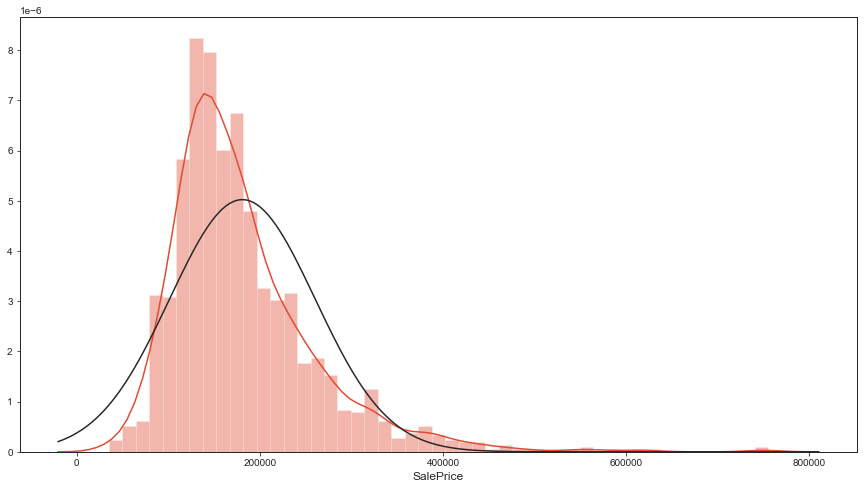

In [15]:
# traget class distribution
from scipy.stats import norm
sns.distplot(house_df['SalePrice'], fit=norm)

The Sale Price is skewed to the right, leptokurtic and deviates from normal distribution. The positive skew creates outliers in the boxplot. Let's take a closer look at them.

In [16]:
house_df['SalePrice'].dropna().sort_values().tail(15)

Id
528     446261
592     451950
1244    465000
1374    466500
186     475000
799     485000
179     501837
770     538000
441     555000
1047    556581
804     582933
899     611657
1170    625000
1183    745000
692     755000
Name: SalePrice, dtype: int64

Yes, there are extreme values but nothing seems to be abnormal to be defined as an outlier. However, linear models assume normally distributed data, we apply logarithmic transformation to reduce the skew of the SalePrice variable.

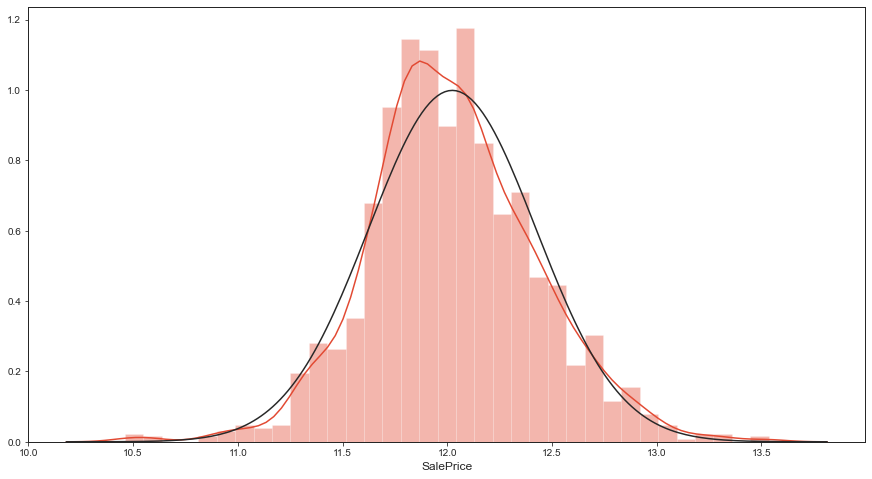

In [17]:
figsize(15,8)
sns.distplot(np.log1p(house_df['SalePrice']), fit= norm)

Text(0.5, 1.0, 'Probablity plot after log transformation')

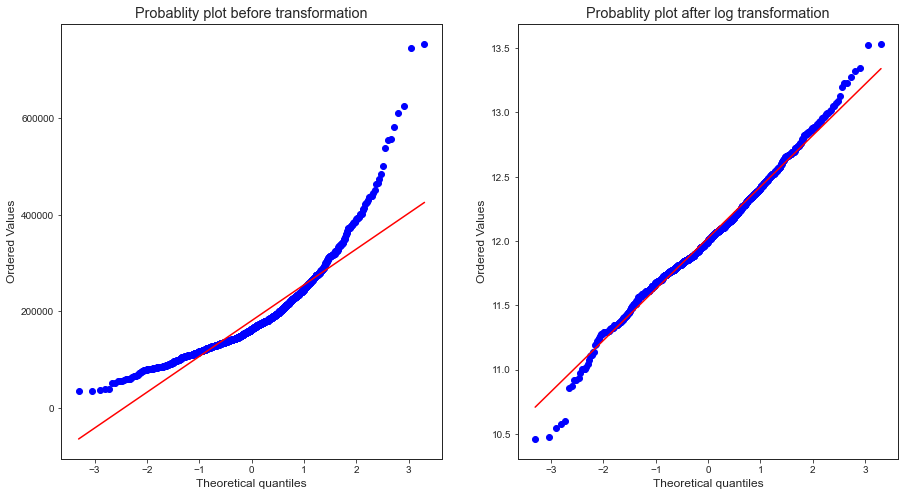

In [18]:
# plot QQ plot
from scipy import stats
fig, (ax1,ax2) =plt.subplots(1,2)
before= stats.probplot(house_df['SalePrice'], plot= ax1)
ax1.set_title('Probablity plot before transformation')
after = stats.probplot(np.log1p(house_df['SalePrice']), plot= ax2)
ax2.set_title('Probablity plot after log transformation')

The Sale price data now appears to be more normally distributed.

# Look for relationships
## Numerical features



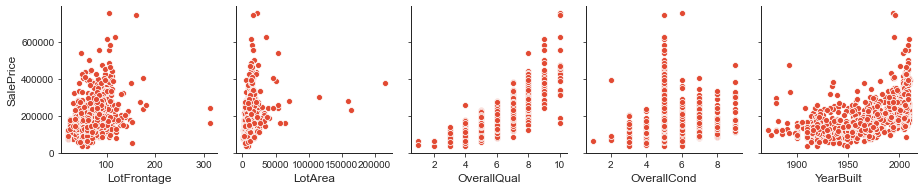

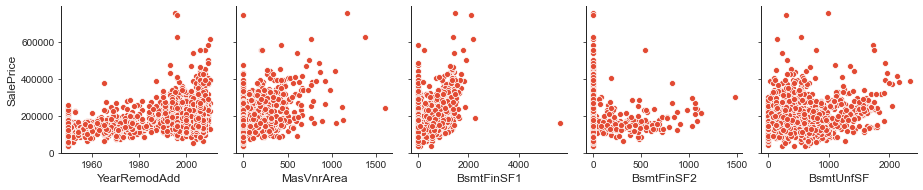

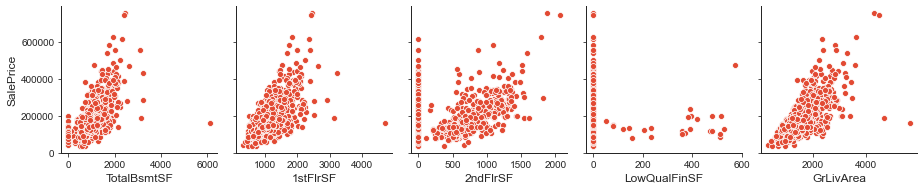

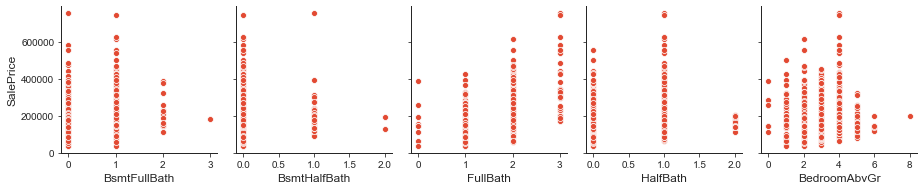

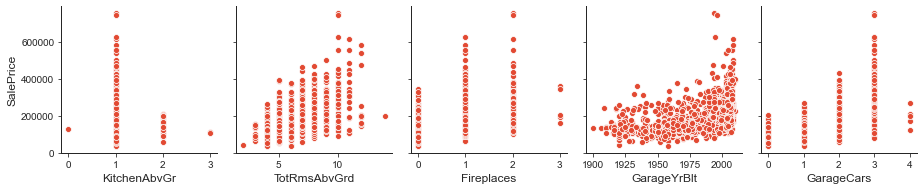

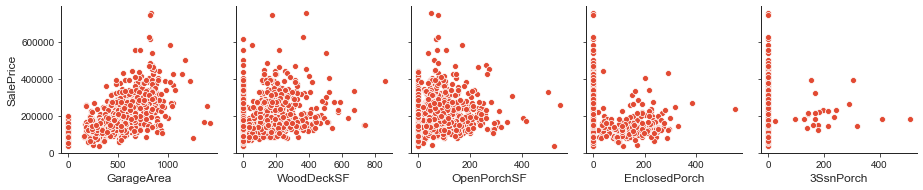

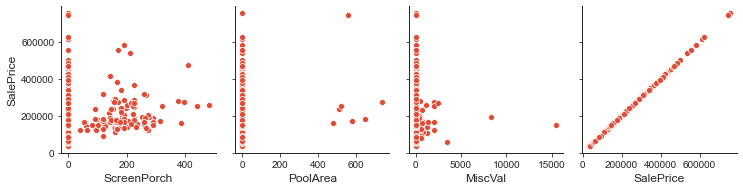

In [19]:
for i in range(0, len(num_features_list)-1,5):
  sns.pairplot(data= house_df, x_vars= num_features_list[i:i+5], y_vars= 'SalePrice')
  


IndexError: ignored

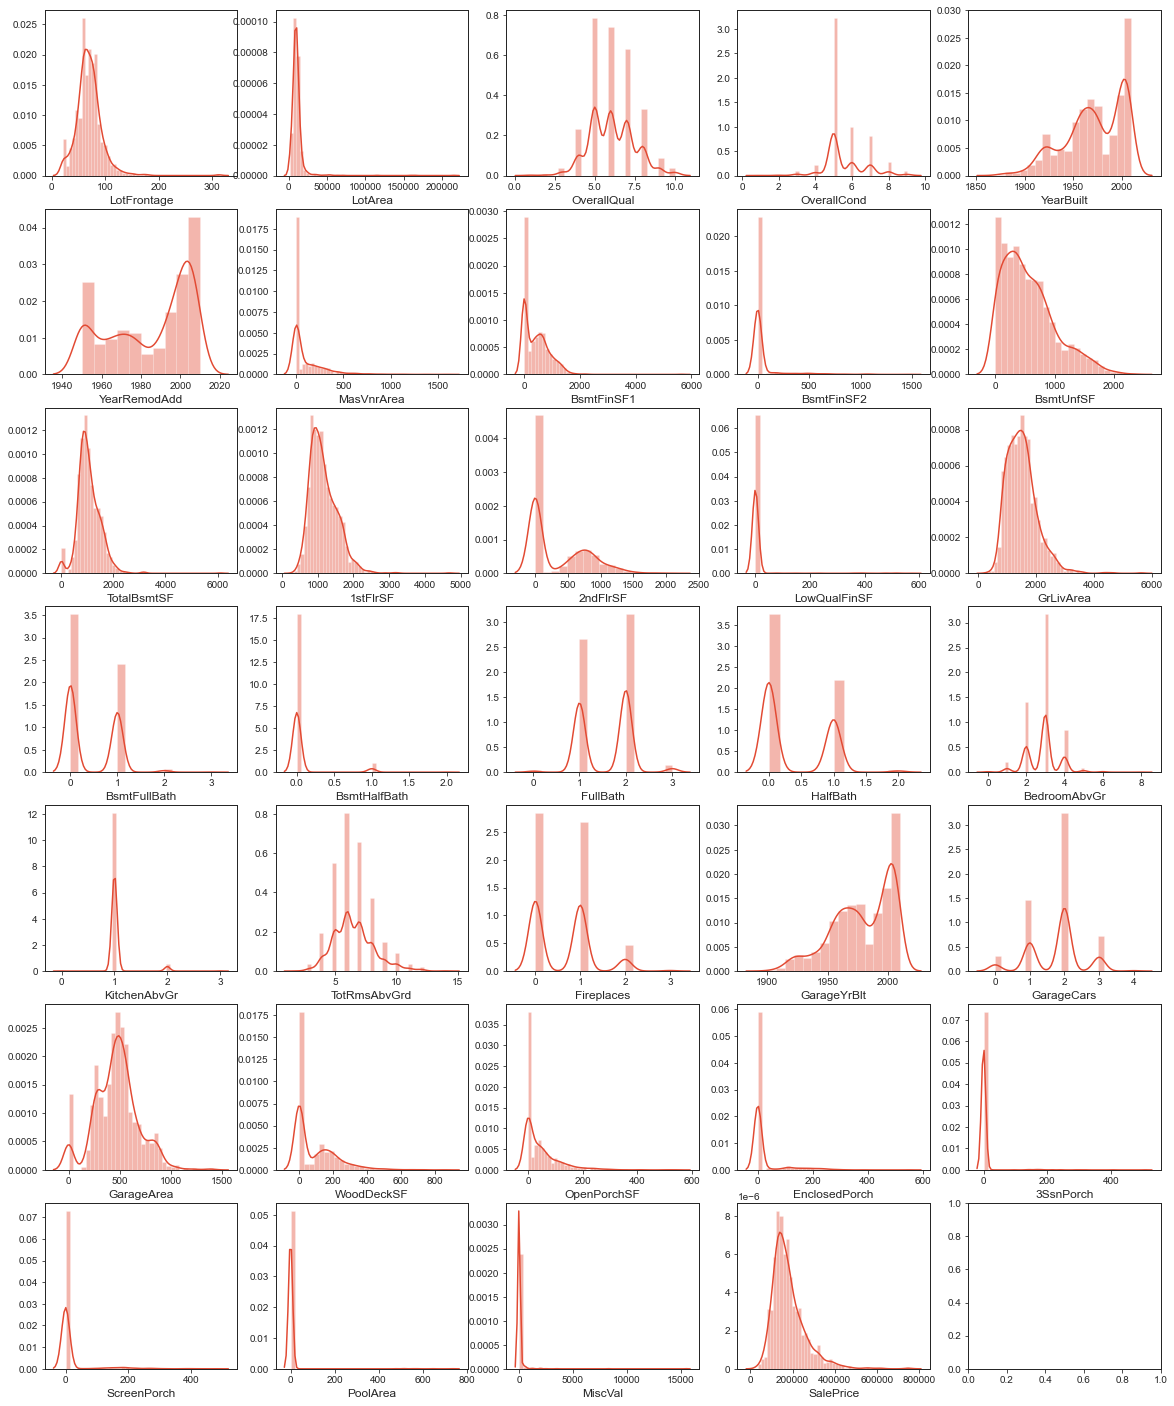

In [20]:
figsize(20,25)
fig, ax= plt.subplots(round(len(num_features_list)/5),5)
for i, ax in enumerate(fig.axes):
  sns.distplot(house_df[num_features_list[i]], ax=ax)


In [0]:
def corr_table(df, variable):
  corr_sort= df.corrwith(df[variable]).sort_values(ascending= False).round(2)
  corr_df= pd.DataFrame(data= corr_sort, columns=['Correlation'])
  return corr_df


In [23]:
corr_house= corr_table(house_df[num_features_list], 'SalePrice')
corr_house_high = corr_house[abs(corr_house)>0.6].dropna()
corr_house_high

Correlation
SalePrice           1.00
OverallQual         0.79
GrLivArea           0.71
GarageCars          0.64
GarageArea          0.62
TotalBsmtSF         0.61
1stFlrSF            0.61

In [24]:
corr_house_high.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

Of the above features, GrLivArea, TotalBsmtSF and 1stFlrSF have high correlation as well as positive skew. Overall Quality has the highest correlation with sale price and is very intuitive. Garage Cars and garage area are representative of the same space. Hence, we can choose only one of the variables and drop the other.

To do:
* treat GrLivArea, TotalBsmtSF and 1stFlrSF with boxcox 1p transformation, RobustScalar before applying linear regression.
* Check if the transformed variables follow normal distribution
* drop GarageArea/GarageCars


Let's take a deeper look into these variables. How does overall quality affect the sale price with respect to each of these features?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  from ipykernel import kernelapp as app


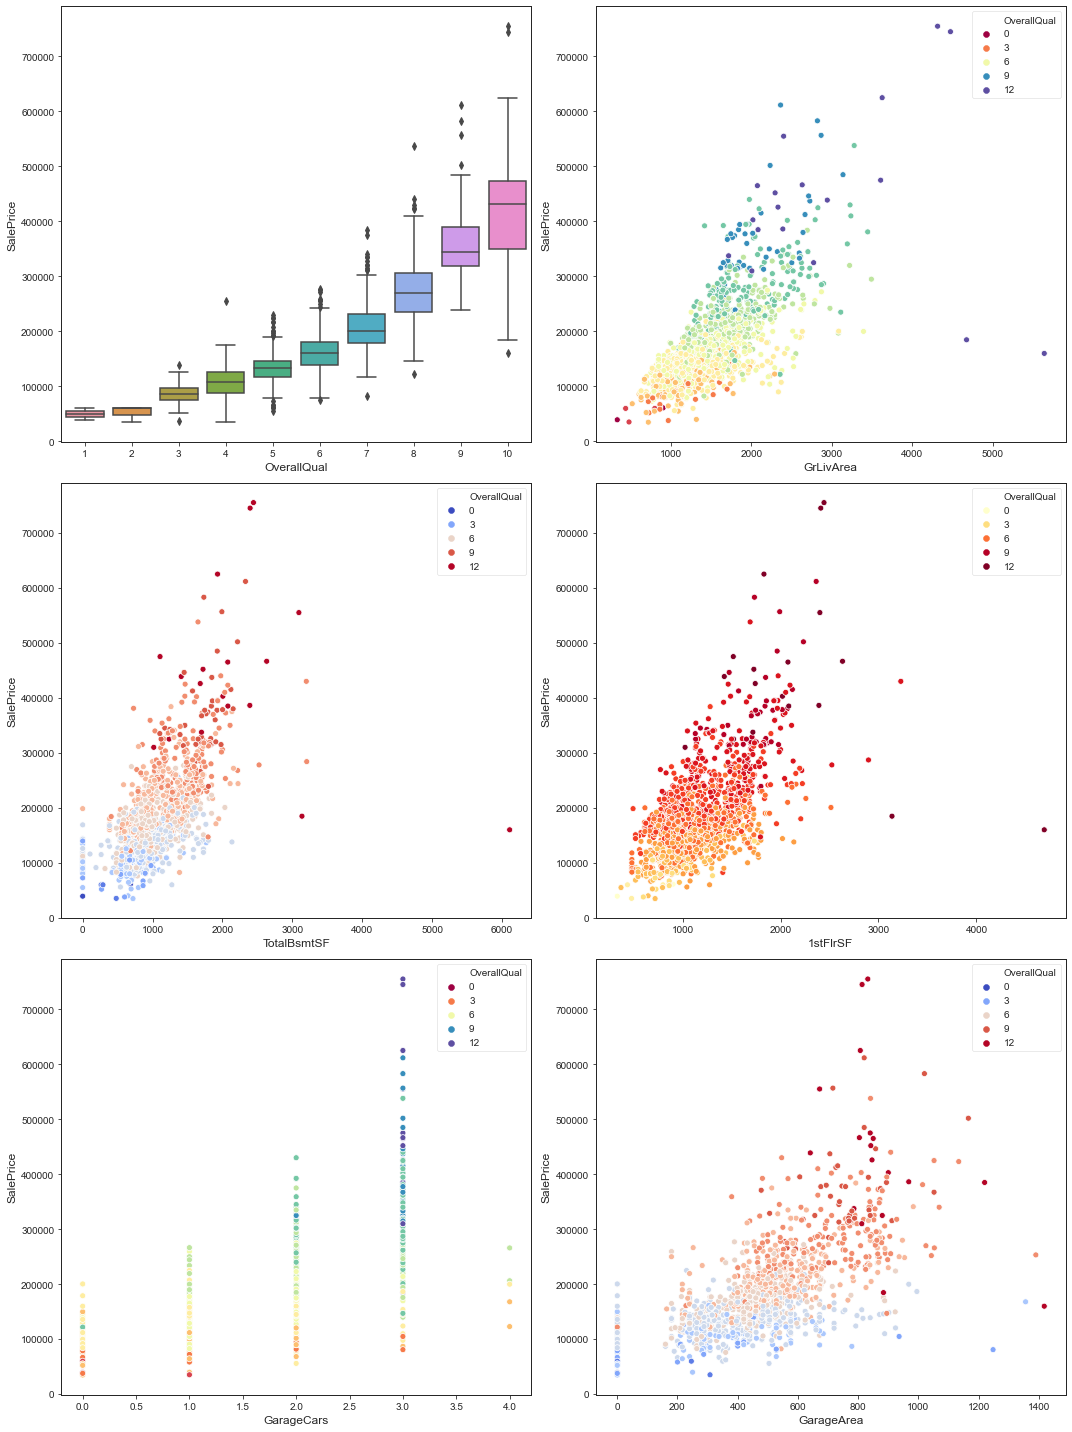

In [25]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.boxplot(x= 'OverallQual',y='SalePrice', data=house_df)
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='TotalBsmtSF', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x= '1stFlrSF', y='SalePrice', data= house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[2,0])
sns.scatterplot(x= 'GarageCars', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[2,1])
sns.scatterplot(x= 'GarageArea', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette='coolwarm')
plt.tight_layout()

# Outliers:
I am specifically looking for high quality building points at bottom right corners. I expect that buildings of high quality and possessing more of a feature demand higher price. And if they don't, something is unsual. And unless, it has a good explanation, I would consider it an extreme observation and remove it.  

Detecting them:

in GrLivArea beyond the 4000 mark . Similarly, in 1stFlrSf, TotalBsmtSF and 1stFlrSF the points beyond the 3000 mark; GarageArea beyond the 1400 mark. These two houses are of of high quality and ideally demand high price. Hence, we consider them as outliers. 

Removing them:

In [0]:
# remove outliers
# GrLivArea
index_val_Gr = house_df[(house_df['GrLivArea']>4000) & (house_df['SalePrice']<200000) ].index
house_df = house_df.drop(index= index_val_Gr)

In [27]:
corr_house_medium= corr_house[(abs(corr_house) >0.1) & (abs(corr_house)<0.6)].dropna()
corr_house_medium

Correlation
FullBath              0.56
TotRmsAbvGrd          0.53
YearBuilt             0.52
YearRemodAdd          0.51
GarageYrBlt           0.49
MasVnrArea            0.48
Fireplaces            0.47
BsmtFinSF1            0.39
LotFrontage           0.35
WoodDeckSF            0.32
2ndFlrSF              0.32
OpenPorchSF           0.32
HalfBath              0.28
LotArea               0.26
BsmtFullBath          0.23
BsmtUnfSF             0.21
BedroomAbvGr          0.17
ScreenPorch           0.11
EnclosedPorch        -0.13
KitchenAbvGr         -0.14

In [28]:
corr_house_medium.index

Index(['FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch',
       'KitchenAbvGr'],
      dtype='object')

These features have good to low correlation. Of these, MasVnrArea, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF, ScreenPorch, EnclosedPorch have positive skew and hence need to be treated. The rest don't seem to have a skew, so, we apply just RobustScalar to these. The variables YearBuilt and YearRemodAdd can be further engineered as the age of the house counted from today. The newer the house, better the price

To do:
* Treat MasVnrArea, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF, LotArea, ScreenPorch, EnclosedPorch with boxcox 1p transformation, RobustScalar 
* Check if transformed variables follow normal distribution
* apply RobustScalar to FullBath,TotRmsAbvGrd,Fireplaces, 2ndFlrSF,HalfBath, BsmtFullBath, BsmtUnfSF, BedroomAbvGr, KitchenAbvGr
* calculate age of the house from year built, year remodelled and garage built



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  from ipykernel import kernelapp as app


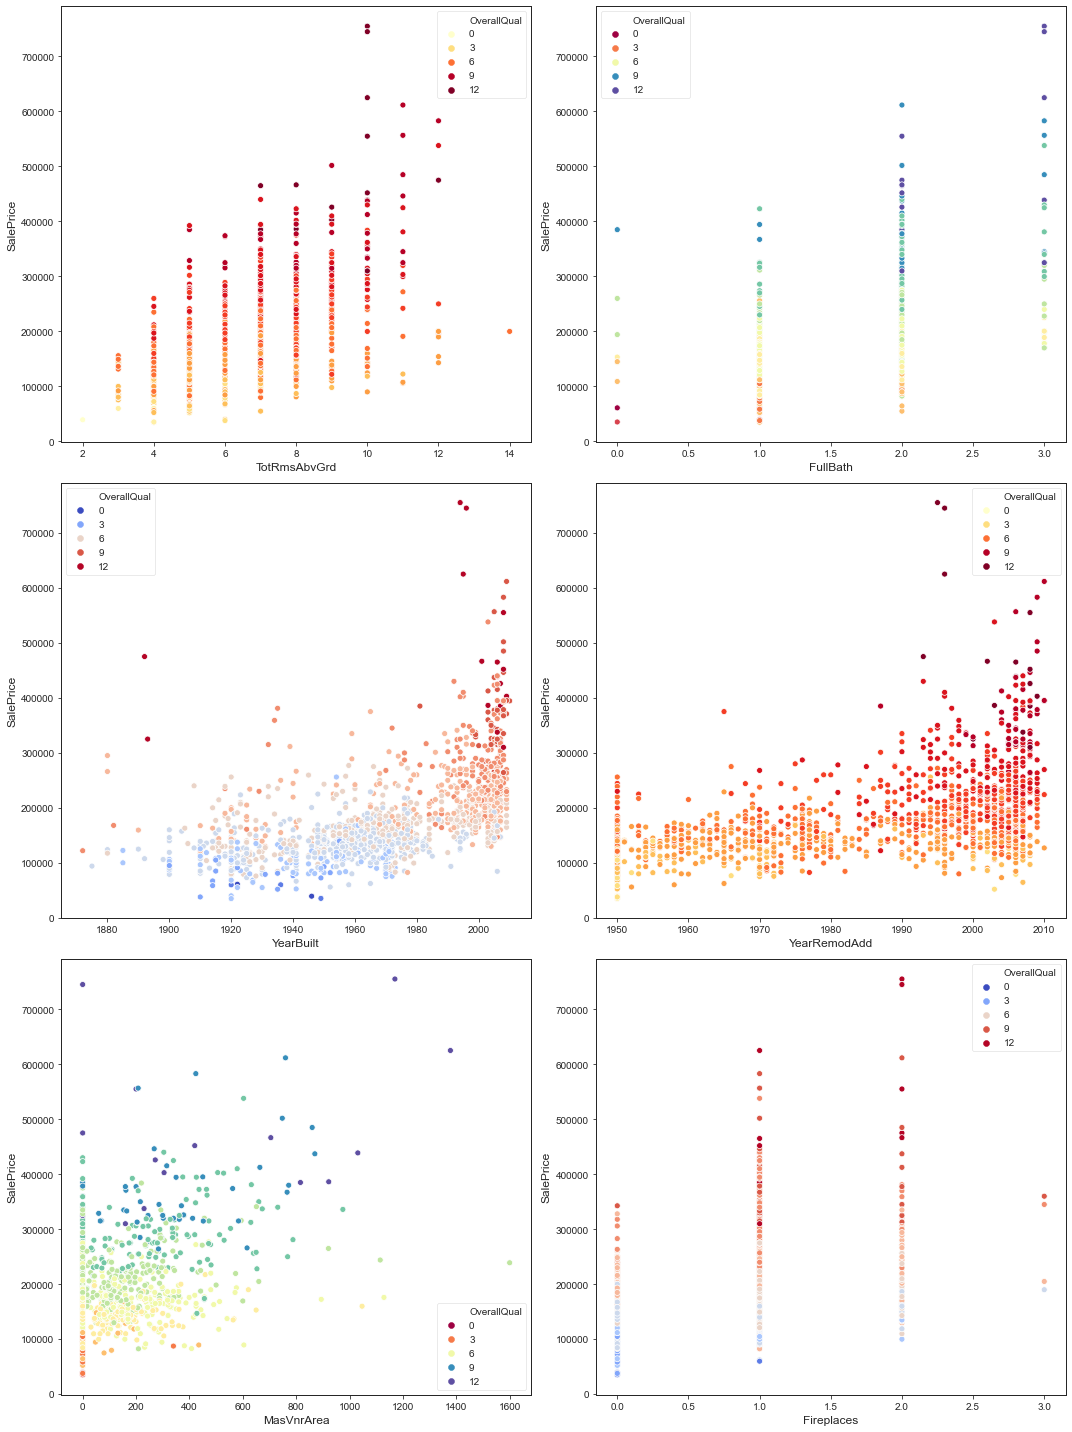

In [29]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.scatterplot(x= 'TotRmsAbvGrd',y='SalePrice', data=house_df, hue= 'OverallQual', palette='YlOrRd')
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='FullBath', y='SalePrice', data=house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='YearBuilt', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x= 'YearRemodAdd', y='SalePrice', data= house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[2,0])
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[2,1])
sns.scatterplot(x= 'Fireplaces', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette='coolwarm')
plt.tight_layout()

Nothing seems out of the ordinary. Newer built buildings or remodelled recently seem to command a higher price. Two of the buildings built in late 1880's command a higher price. That could be attributed to thier overall quality and subsequent recent remodelling.

In [30]:
house_df[ (house_df['YearBuilt']>1880) & (house_df['YearBuilt']<1900) & (house_df['SalePrice']> 200000)]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                           
186          75       RM         90.0    22950   Pave      IR2         Lvl   
584          75       RM         75.0    13500   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                              
186    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam   
584    AllPub    Inside       Gtl      OldTown     Artery       PosA     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                            
186     2.5Fin           10            9       1892          1993     Gable   
584     2.5Unf           10            9       1893          2000     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                      
186  WdShngl     Wd Sdng     Wd Sdng       None         0.0        Gd   
584  CompShg     Wd Sdng     Wd Sdng       None         0.0        Ex   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                     
186        Gd     BrkTil       TA       TA           Mn          Unf   
584        Ex     BrkTil       TA       TA           No          Unf   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                         
186           0          Unf           0       1107         1107    GasA   
584           0          Unf           0       1237         1237    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                      
186        Ex          Y      SBrkr      1518      1518           572   
584        Gd          Y      SBrkr      1521      1254             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                             
186       3608             0             0         2         1             4   
584       2775             0             0         3         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
Id                                                                              
186             1          Ex            12        Typ           2     Detchd   
584             1          Gd             9        Typ           1     Detchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
Id                                                                            
186       1993.0          Unf           3         840         Ex         TA   
584       1988.0          Unf           2         880         Gd         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                  
186          Y           0          260              0          0   
584          Y         105          502              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
Id                                                                           
186          410         0        0       6    2006       WD        Normal   
584            0         0        0       7    2008       WD        Normal   

     SalePrice  
Id              
186     475000  
584     325000

Let's take a closer look at the rest of the features

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  app.launch_new_instance()


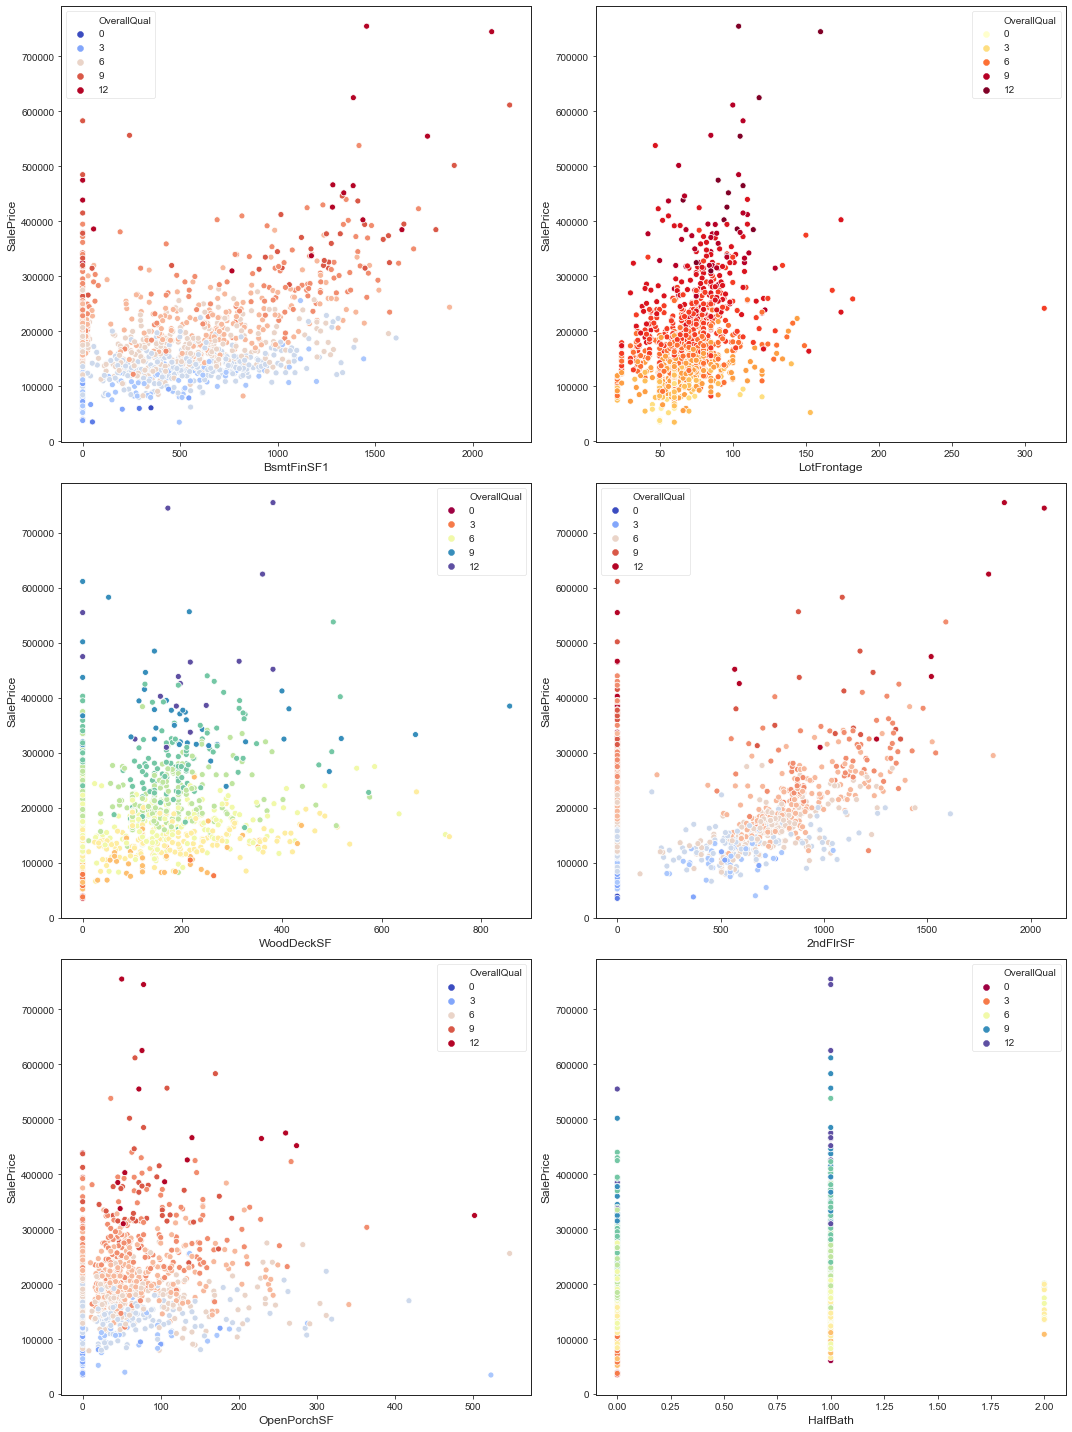

In [31]:
fig= plt.figure(constrained_layout= True, figsize=(15,20))
spec= gridspec.GridSpec(nrows= 3, ncols= 2, figure= fig)

f_ax3= fig.add_subplot(spec[0,0]);
sns.scatterplot(x='BsmtFinSF1', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[0,1]);
sns.scatterplot(x= 'LotFrontage', y='SalePrice', data= house_df, hue='OverallQual', palette='YlOrRd')
f_ax5= fig.add_subplot(spec[1,0])
sns.scatterplot(x= 'WoodDeckSF', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette = 'Spectral')
f_ax6= fig.add_subplot(spec[1,1])
sns.scatterplot(x= '2ndFlrSF', y= 'SalePrice', data= house_df, hue= 'OverallQual', palette='coolwarm')
f_ax1= fig.add_subplot(spec[2,0]);
sns.scatterplot(x= 'OpenPorchSF',y='SalePrice', data=house_df,hue='OverallQual', palette='coolwarm')
f_ax2= fig.add_subplot(spec[2,1]);
sns.scatterplot(x='HalfBath', y='SalePrice', data=house_df, hue= 'OverallQual', palette='Spectral')
plt.tight_layout()

One building with a large lotfrontage medium quality seems to stand out from the rest. Also one with a large open porch. Let's take a closer look

In [0]:

# remove outliers
# OpenPorchArea
index_val_porch = house_df[(house_df['OpenPorchSF']>400) & (house_df['SalePrice']<400000) & (house_df['OverallQual']>9) ].index
house_df = house_df.drop(index= index_val_porch)

In [0]:
# LotFrontage
index_val_lot= house_df[(house_df['LotFrontage']>300) & (house_df['SalePrice']<300000)  ].index
house_df = house_df.drop(index= index_val_lot)

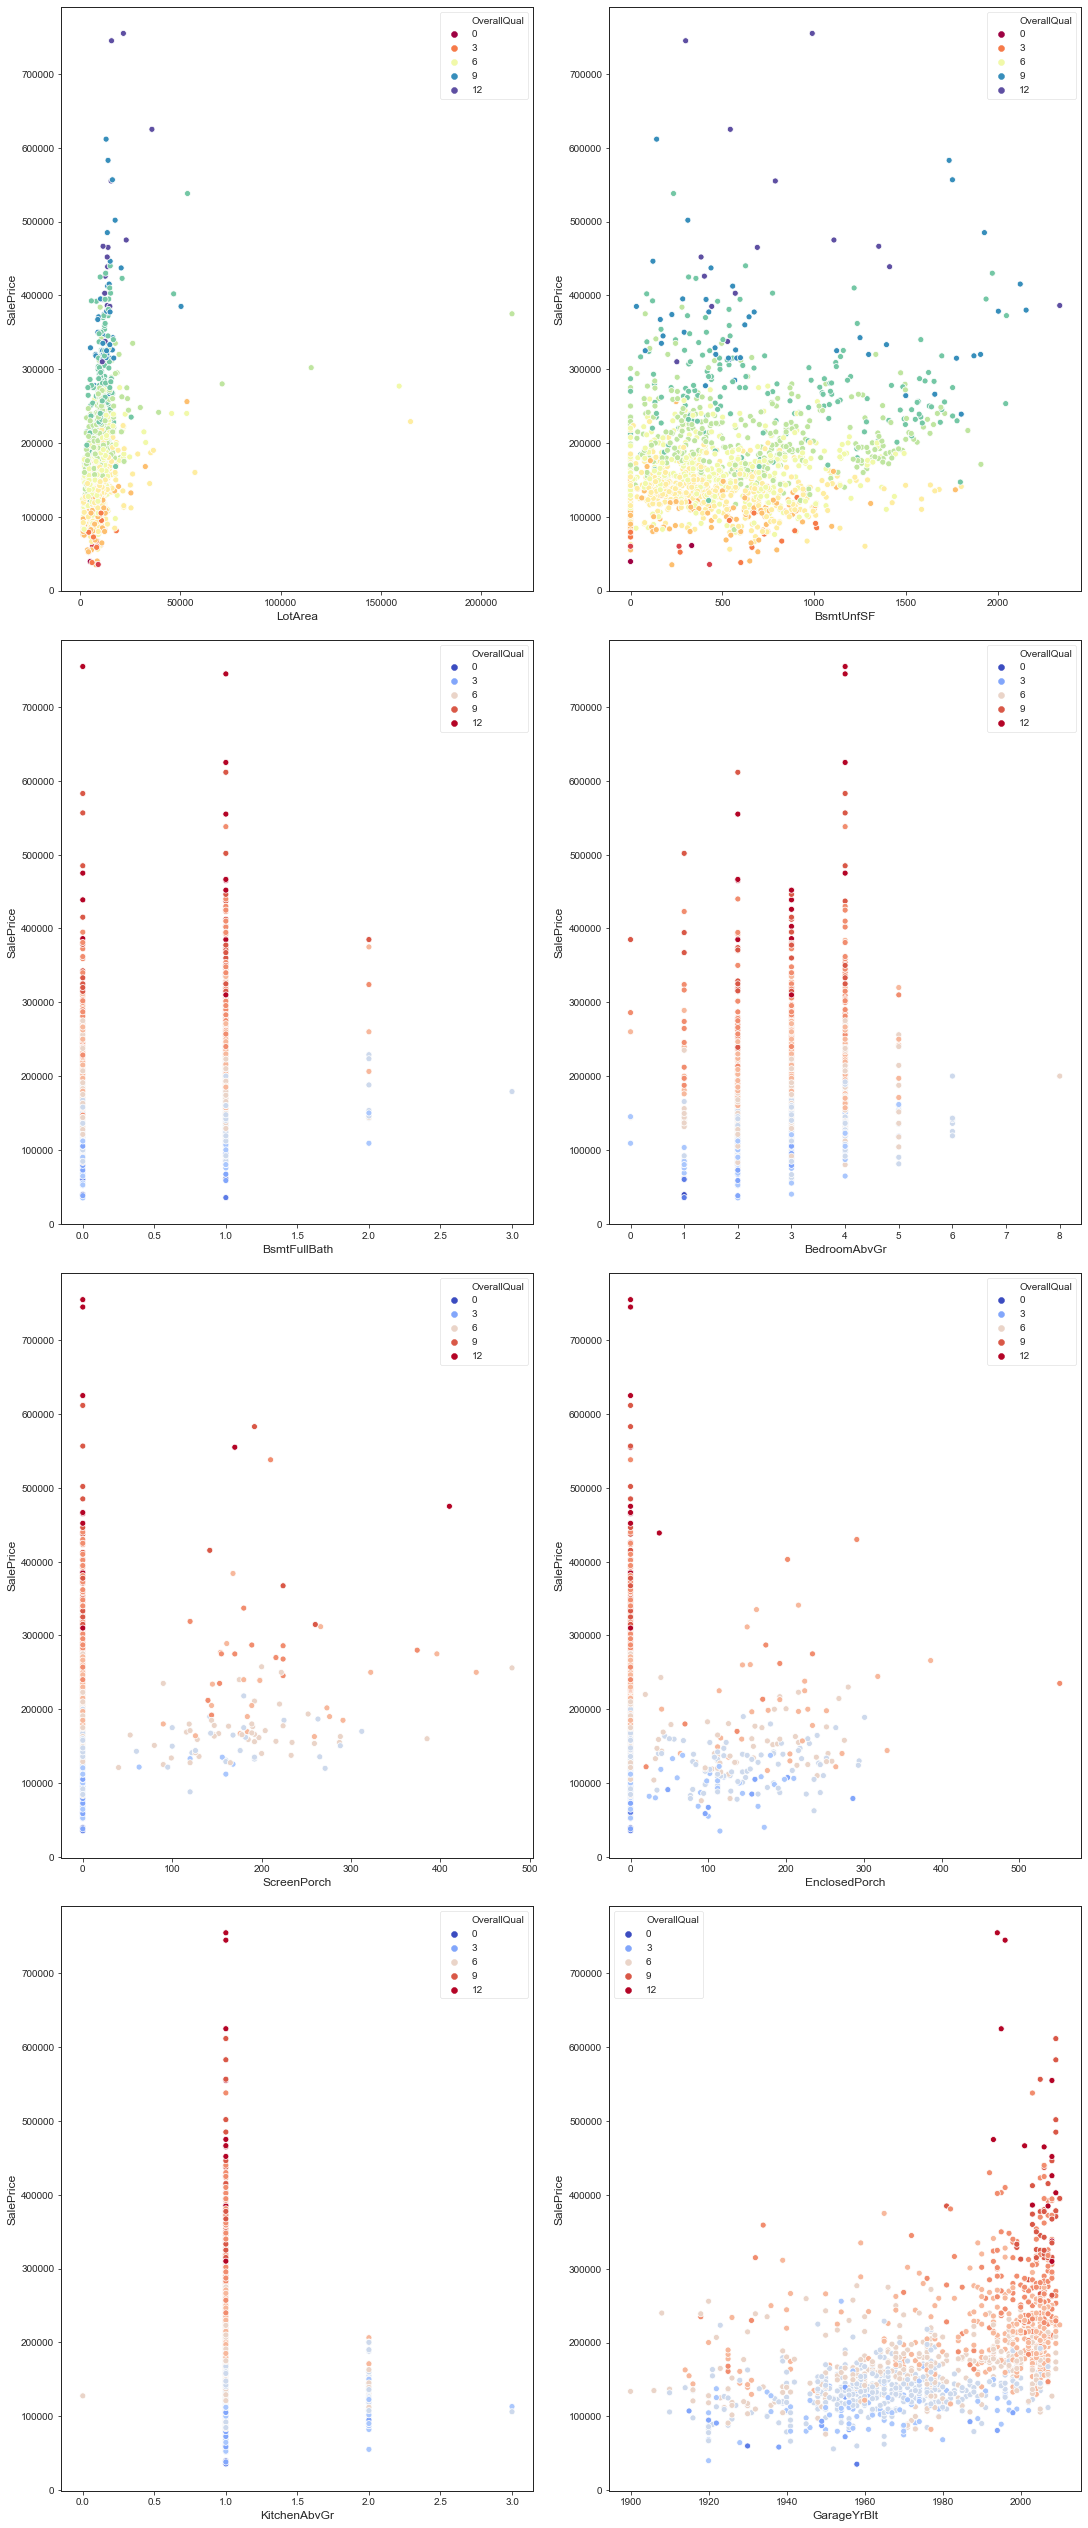

In [34]:
fig= plt.figure(constrained_layout= True, figsize=(15,35))
spec= gridspec.GridSpec(nrows= 4, ncols= 2, figure= fig)
f_ax1= fig.add_subplot(spec[0,0]);
sns.scatterplot(x='LotArea', y='SalePrice', data=house_df, hue= 'OverallQual', palette='Spectral')
f_ax2= fig.add_subplot(spec[0,1]);
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=house_df, hue= 'OverallQual', palette='Spectral')
f_ax3= fig.add_subplot(spec[1,0]);
sns.scatterplot(x='BsmtFullBath', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax4= fig.add_subplot(spec[1,1]);
sns.scatterplot(x='BedroomAbvGr', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax5= fig.add_subplot(spec[2,0]);
sns.scatterplot(x='ScreenPorch', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax6= fig.add_subplot(spec[2,1]);
sns.scatterplot(x='EnclosedPorch', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax7= fig.add_subplot(spec[3,0]);
sns.scatterplot(x='KitchenAbvGr', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')
f_ax7= fig.add_subplot(spec[3,1]);
sns.scatterplot(x='GarageYrBlt', y='SalePrice',data= house_df ,hue='OverallQual', palette='coolwarm')

In EnclosedPorch, one point above 500 mark and below 300000 SalePrice seems a bit out of the ordinary. Let's take a closer look

In [35]:
house_df[house_df['EnclosedPorch']>500]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                           
198          75       RL        174.0    25419   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                              
198    AllPub    Corner       Gtl        NAmes     Artery       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                            
198     2Story            8            4       1918          1990     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                      
198  CompShg      Stucco      Stucco       None         0.0        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                     
198        Gd      PConc       TA       TA           No          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                         
198        1036          LwQ         184        140         1360    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                      
198        Gd          Y      SBrkr      1360      1360           392   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                             
198       3112             1             1         2         0             4   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
Id                                                                              
198             1          Gd             8        Typ           1     Detchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
Id                                                                            
198       1918.0          Unf           2         795         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                  
198          Y           0           16            552          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
Id                                                                           
198            0       512        0       3    2006       WD       Abnorml   

     SalePrice  
Id              
198     235000

Although the overall quality of the house is rated 8, the building was built in 1918 and remodelled in 1990. And maybe that's why it is priced lower. 

In [36]:
corr_house_low= corr_house[abs(corr_house)<0.1].dropna()
corr_house_low

Correlation
PoolArea             0.09
3SsnPorch            0.04
BsmtFinSF2          -0.01
BsmtHalfBath        -0.02
MiscVal             -0.02
LowQualFinSF        -0.03
OverallCond         -0.08

In [37]:
corr_house_low.index

Index(['PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'OverallCond'],
      dtype='object')

The variables Pool Area, 3SsnPorch,BsmtFinSF2, MiscVal, LowQualFinSF have very low correlation and a high positve skew. BsmtHalfBath has a positive skew. These can be dropped. 

To do:
* Drop Pool Area, 3SsnPorch,BsmtFinSF2, MiscVal, LowQualFinSF ,BsmtHalfBath
* re-consider OverallCond after applying RobustScalar




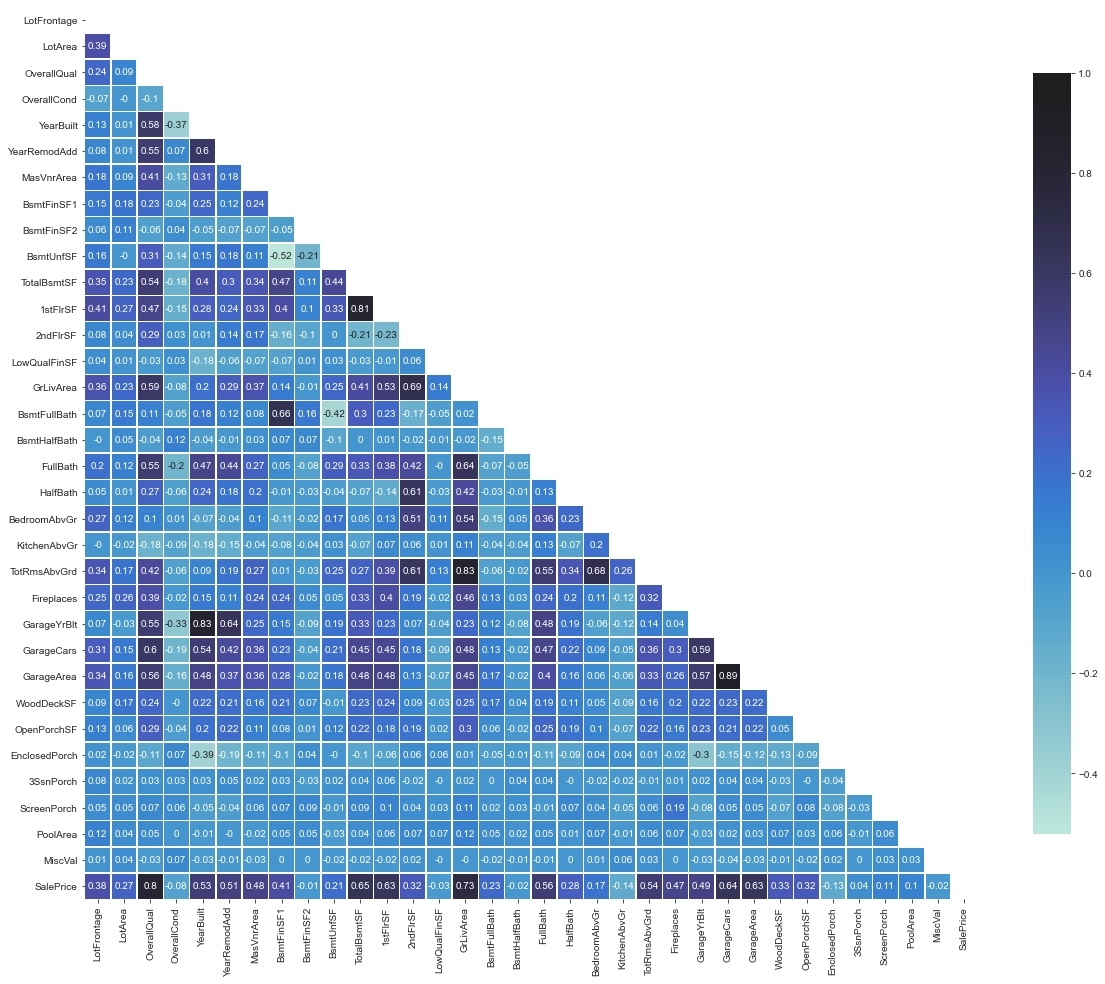

In [38]:
# Heatmap
corr= house_df[num_features_list].corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (20,20))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, 
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

We have already seen correlations with SalePrice. Let's identify explanatory variables that have high correlation amongst themselves. 
* 1stFlrSF with TotalBsmtSF, (1st floor lies over the basement area)
* TotRmsAbvGr with GrLivArea, 
* YearBuilt with GarageYrBuilt 
* GarageArea with GarageCars as we suspected earlier.


We can choose to keep one of these variables with higher correlation to SalePrice and drop the others.
We drop : 1stFlrSF, TotRmsAbvGrd, GarageYrBlt and GarageArea.

There are other variables which are correlated with each other. Overall, the heatmap indicated the existence of multicollinearity. 

The listings have SF of Basement, 1st Floor and 2nd in individual columns which are correlated. We could create a new column combining all three into one- TotalSF and see how it fares against SalePrice and rest of the variables!





So far, we studied the numerical variables, their relationship with SalePrice, correlations and distributions. We removed few extreme observations, and shortlisted variables with high skewness to be turned into 'normal' using Box Cox transformation. Further, our data contains features varying in magnitude, range and units. Although linear models aren't affected by it, algorithms that compute distance such as k-nearest neighbors, tree based models etc do. Hence, we apply RobustScalar so that the feature scaling method is robust to outliers.

To summarize, we apply Box cox transformation and RobustScalar to high-skewed variables and just RobustScalar to low/no skewed variables and drop the above listed variables


In [39]:
len(num_features_list)

34

In [0]:
num_var_drop=['1stFlrSF', 'TotRmsAbvGrd','GarageYrBlt','GarageArea',  'PoolArea', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal',
       'LowQualFinSF', 'OverallCond']

In [41]:
len(num_var_drop)

11

In [42]:
num_features_list=list(set(num_features_list)- set(num_var_drop))
len(num_features_list)  


23

After dropping 11 features, we get 23 numerical variables of which 22 are explanatory variables and one is SalePrice, our target variable. 

Before we apply transformation, let's see if we have any missing values.

In [43]:
house_df[num_features_list].isna().sum()

BsmtFinSF1         0
EnclosedPorch      0
GarageCars         0
MasVnrArea         8
HalfBath           0
LotFrontage      259
BsmtFullBath       0
Fireplaces         0
BedroomAbvGr       0
SalePrice          0
WoodDeckSF         0
ScreenPorch        0
FullBath           0
YearBuilt          0
BsmtUnfSF          0
TotalBsmtSF        0
YearRemodAdd       0
KitchenAbvGr       0
GrLivArea          0
LotArea            0
OpenPorchSF        0
2ndFlrSF           0
OverallQual        0
dtype: int64

In [0]:
# Using mean of the column to fill missing values
from statistics import mean
house_df['LotFrontage']=house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean())

Let's replot the heat map and remove features that are still highly correlated with each other.

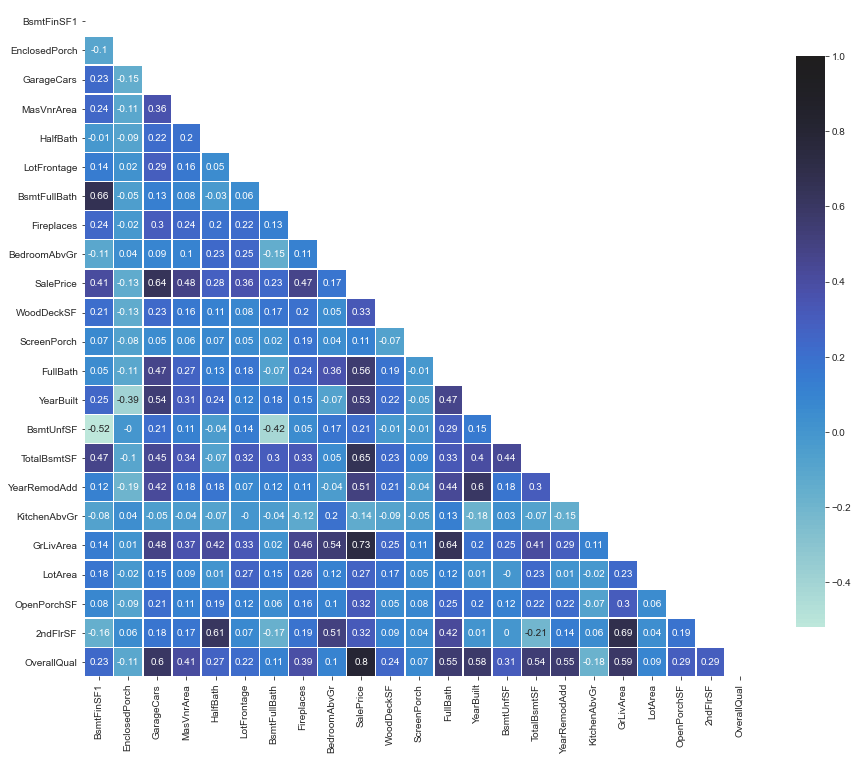

In [45]:

# Heatmap
corr= house_df[num_features_list].corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (15,15))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, 
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

This process can be automated, maybe it's a task for another day. For now, we identify variables that are highly collinear (correlation>0.6) and remove ones that have lesser correlation with Sale Price. 

* 'HalfBath' with '2ndFlrSF'
* 'GrLivArea' with '2ndFlrSF'
* 'BsmtFinSF1' with 'BsmtFullBath'
* 'GrLivArea' with 'FullBath'

Although there are 

We drop '2ndFlrSF', 'FullBath' and 'BsmtFullBath'

In [46]:
var_drop= ['2ndFlrSF', 'FullBath' and 'BsmtFullBath']
num_features_list=list(set(num_features_list)- set(var_drop))
len(num_features_list)  

21

We apply box cox tranformation to ['GrLivArea', 'TotalBsmtSF','MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'EnclosedPorch'] as they are highly skewed and RobustScalar to all of them.

In [0]:
boxcox_var= ['GrLivArea', 'TotalBsmtSF','MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'EnclosedPorch']

Let's study the categorical features in our dataset.
## Categorical Features

In [48]:
cat_features_list

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

Let's check how many categories each of the features has. A high number may pose a problem for our ML models

In [49]:
cat_unique=[]
for feature in cat_features_list:
  cat_unique_len = len(house_df[feature].unique())
  cat_unique.append(cat_unique_len)

cat_unique_list= pd.DataFrame(data=cat_unique, index=cat_features_list, columns=['No. of unique labels'])
cat_unique_list_sort= cat_unique_list.sort_values(by= ['No. of unique labels'], ascending = False)
cat_unique_list_sort

No. of unique labels
Neighborhood                     25
Exterior2nd                      16
MSSubClass                       15
Exterior1st                      15
MoSold                           12
Condition1                        9
SaleType                          9
HouseStyle                        8
GarageType                        7
Functional                        7
BsmtFinType1                      7
Condition2                        7
RoofMatl                          7
BsmtFinType2                      7
GarageQual                        6
Electrical                        6
Heating                           6
GarageCond                        6
Foundation                        6
SaleCondition                     6
RoofStyle                         6
YrSold                            5
LotConfig                         5
MSZoning                          5
BldgType                          5
HeatingQC                         5
ExterCond                         5
MasVnrType                        5
BsmtExposure                      5
BsmtCond                          5
BsmtQual                          5
ExterQual                         4
GarageFinish                      4
LandContour                       4
LotShape                          4
KitchenQual                       4
LandSlope                         3
PavedDrive                        3
CentralAir                        2
Utilities                         2
Street                            2

Let's see if each of these variables affect the SalePrice. We will first draw pairplots to see if each of these variables have an effect on SalePrice

We will use swarmplot to also map the density of points.

In [50]:
cat_unique_list_sort.index

Index(['Neighborhood', 'Exterior2nd', 'MSSubClass', 'Exterior1st', 'MoSold',
       'Condition1', 'SaleType', 'HouseStyle', 'GarageType', 'Functional',
       'BsmtFinType1', 'Condition2', 'RoofMatl', 'BsmtFinType2', 'GarageQual',
       'Electrical', 'Heating', 'GarageCond', 'Foundation', 'SaleCondition',
       'RoofStyle', 'YrSold', 'LotConfig', 'MSZoning', 'BldgType', 'HeatingQC',
       'ExterCond', 'MasVnrType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'ExterQual', 'GarageFinish', 'LandContour', 'LotShape', 'KitchenQual',
       'LandSlope', 'PavedDrive', 'CentralAir', 'Utilities', 'Street'],
      dtype='object')

In [51]:
# Create a dataframe with categorical features only
cat_house_df= house_df[cat_features_list]
cat_house_df.shape

(1456, 41)

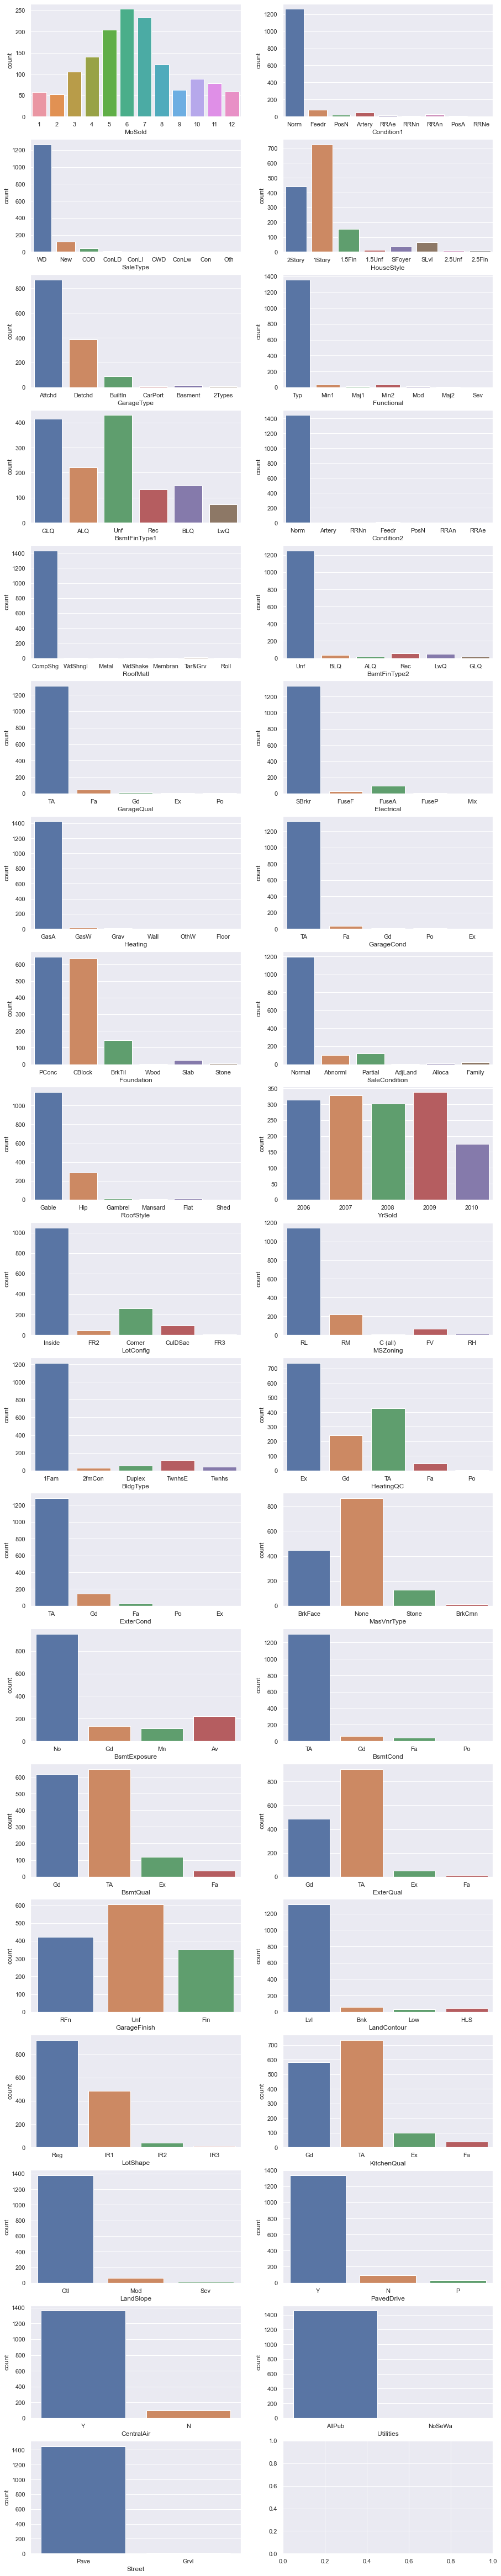

In [52]:
sns.set(rc={'figure.figsize':(15,85)})
fig, axes= plt.subplots(round(len(cat_unique_list_sort[4:])/2)+1,2, sharex=False)
for ax, feature in zip(fig.axes, cat_unique_list_sort[4:].index):
  sns.countplot(cat_house_df[feature],ax=ax)

Let's start our analysis from bottom up. 

The variables  'CentralAir', 'Utilities', 'Street' have two labels. They can be converted to binary variables . 

The variables 'LandSlope', 'PavedDrive' have 3 labels. 

LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

There are more buildings sold with gentle slope than otherwise. Similarly, with fully paved driveway than otherwise. Does this have an effect on SalePrice?

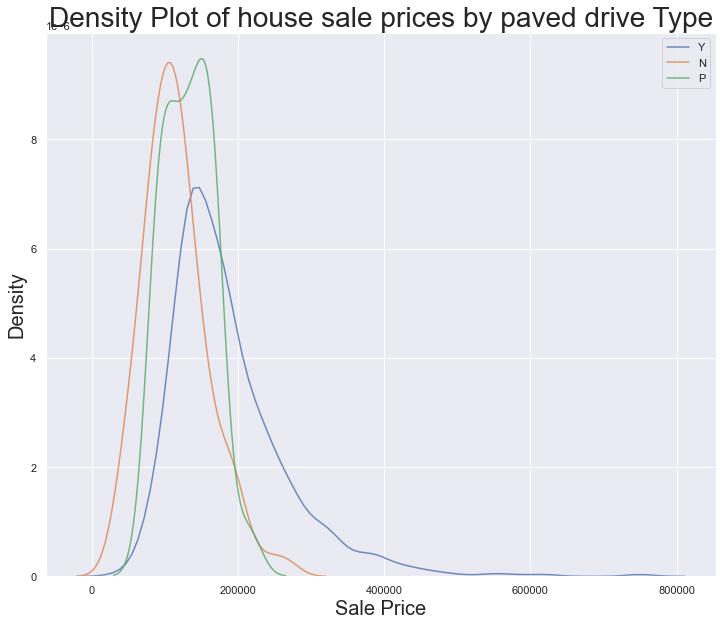

In [53]:
# Create a list of buildings 
types = cat_house_df['PavedDrive'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the paved drive type
    subset = house_df[cat_house_df['PavedDrive'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by paved drive Type', size = 28);

From the density plot above, we can observe that the density plots of partial and dirt paved drives are more closely distributed than that of houses with fully paved drive ways. The mean price of dirt/gravel paved houses is definitely lower which implies that there is an effect of type of pavement on the house price. However, how significant , I'm not sure. I will one hot encode these categorical variables and let my ML model decide.


KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Most buildings sold had average kitchen quality followed by good. Very less kitchens were of excellent or fair. Almost no kitchens were of poor quality.

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Most buildings sold had either regular or slightly irregular lot shape. Very few buildings sold had large irregularities. 



     

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

 My countplots don't represent No Garage as one of the labels as NA might have been thought of as missing values and it needs to be corrected. There might be listings where this column has missing values, but, for this notebook, I'm considering them to be 'No Garage'. I'm happy to learn if there is a better way to do this.

      

In [54]:
cat_house_df['GarageFinish'].isna().sum()

81

There are 81 houses which have no garages 

In [55]:
cat_house_df['GarageFinish'].fillna('No Garage', inplace=True)
cat_house_df['GarageFinish'].value_counts()


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Unf          604
RFn          421
Fin          350
No Garage     81
Name: GarageFinish, dtype: int64

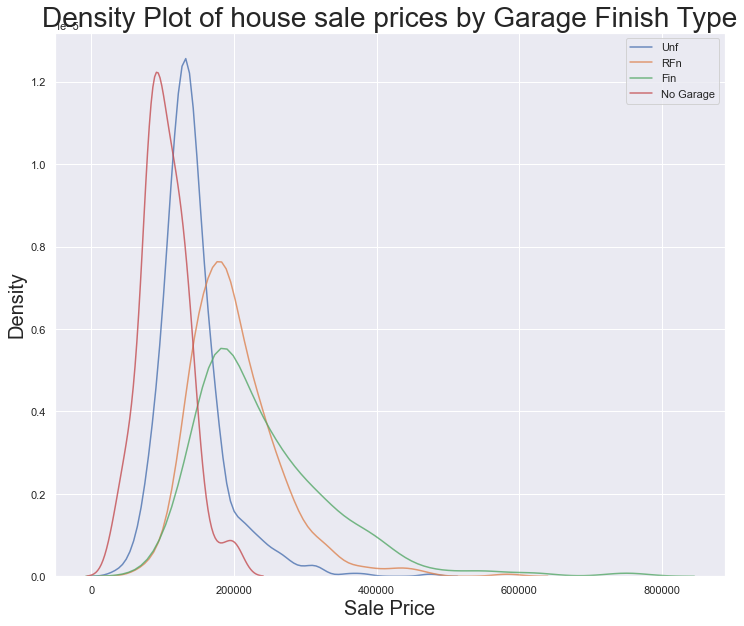

In [56]:
# Create a list of buildings 
types = cat_house_df['GarageFinish'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the garage finish type
    subset = house_df[cat_house_df['GarageFinish'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by Garage Finish Type', size = 28);

From our denisty plot, we observe that houses with no garage command a lower price. We also look for other variables which have similar issue and correct them.

LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Most buildings sold were nearly flat. 

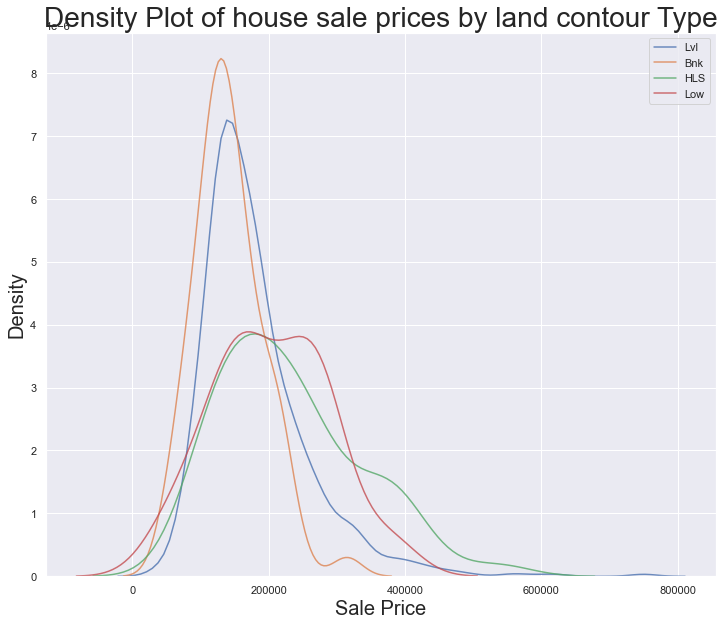

In [57]:
# Create a list of buildings 
types = cat_house_df['LandContour'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the land contour type
    subset = house_df[cat_house_df['LandContour'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by land contour Type', size = 28);

One of my concerns was that I was creating too many dummy variables by 0ne hot encoding my categorical variables. 
So, within the Land contour category, I  wanted to keep Lvl and club rest of the labels into one due to their low values counts. But from the density plot above, I realize that although contour types banked and Hillside have same number of occurences within our dataset, they have varied effects on the sale price. Hence, I will continue to one-hot encode and let my ML model redice which variables are important.

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Most buildings had average foolowed by good quality material on the exterior. 

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [58]:

cat_house_df['BsmtQual'].fillna('No Basement', inplace=True)
cat_house_df['BsmtQual'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


TA             648
Gd             617
Ex             119
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

Very few houses have no basement. Most of the houses sold had average height closely followed by good. The rest of the values are far and few in between. The basement condition for large majority is average. 

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Most buildings don't have exposure        

In [59]:
cat_house_df['BsmtExposure'].fillna('No Basement', inplace=True)
cat_house_df['BsmtExposure'].value_counts()

No             952
Av             221
Gd             131
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

Most buildings don't have a veener type. But brick face is a popular second.



Exterior condition is for most part average. Heating quality is mostly excellent, followed by average and good. 

BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

Most buildings sold are 1Fam Type and few TwnhsE



MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Most of the houses sold are of Residencial Low Density followed by medium density. Very few houses are of Floating village residential  and even less are Residential High Density and Commercial.

       

	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
  Most houses sold are covered by houses on three sides except one frontage followed by corner lots. The next popular houses sold were that of cul-de-sac and frontage on 2 sides of the property.

Year Sold: Houses sold are equally spread between 2006-2009. However, 2010 records a lower number. It could be beacuse out dataset ends before the year is complete or sales in 2010 were affected by the 2008 financial crisis. We could look closer. Let's do a density plot.

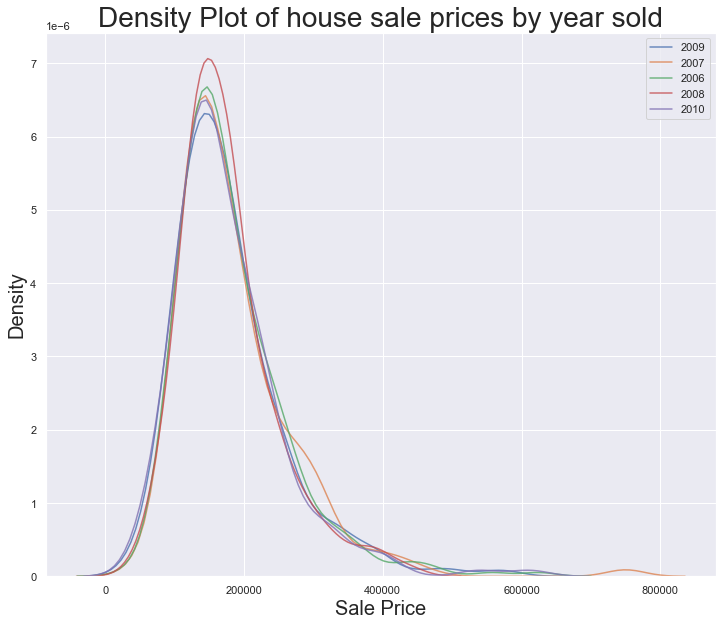

In [60]:
# Create a list of buildings 
types = cat_house_df['YrSold'].value_counts()
types= list(types.index)

# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the land contour type
    subset = house_df[cat_house_df['YrSold'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by year sold', size = 28);

From our plot, we observe that the year sold doesn't have an effect on sale price. We can safely drop the variable. 

Under roofstyle, the most popular one is that of gable which is a classic style in that part of the world. The style 'hip' is again similar that all the roofs are downward sloping. 

Sale condition: Most sales made are normal. 
SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

And the sale type is conventional- Warranty Deed.       

The most popular style of foundations were poured concrete and cinder block. Few houses had brick and tile , and even fewer has either slab or stone

Almost all of the garages were in average condition and has average quality. The houses have GasA type of heating and standard electrical system.

All houses had standard (composite) shingle roof material and this feature can be ignored in our model.	

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)       

In [61]:
cat_house_df['BsmtFinType1'].fillna('No Basement', inplace=True)
cat_house_df['BsmtFinType2'].fillna('No Basement', inplace=True)
cat_house_df['BsmtFinType1'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Unf            429
GLQ            415
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
Most of the houses had attached garage followed by detached and built in garage styles. 

In [0]:
cat_house_df['GarageType'].fillna('No Garage', inplace=True)

Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)  



Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
Almost all the houses have typical functionality       

HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
The majority of the buildings sold were 1st followed by 2nd story. The other types 1.5Fin and split were less popular.       

Month Sold: While I considered the year sold and year remodelled to be numercial variables, I took the month sold as a categorical variable. From our countplot, it is clear that the months 5,6,7 have highest number of sales. Is it because the activity is generally higher in Spring and Summer months? 

To not cluster the plot, I'm plotting the density plot as per season.

In [63]:
cat_house_df['MoSold'].replace([3,4,5],'Spring', inplace=True)
cat_house_df['MoSold'].replace([6,7,8], 'Summer', inplace=True)
cat_house_df['MoSold'].replace([9,10,11],'Fall', inplace=True)
cat_house_df['MoSold'].replace([12,1,2],'Winter', inplace=True)
cat_house_df['MoSold'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Summer    608
Spring    451
Fall      229
Winter    168
Name: MoSold, dtype: int64

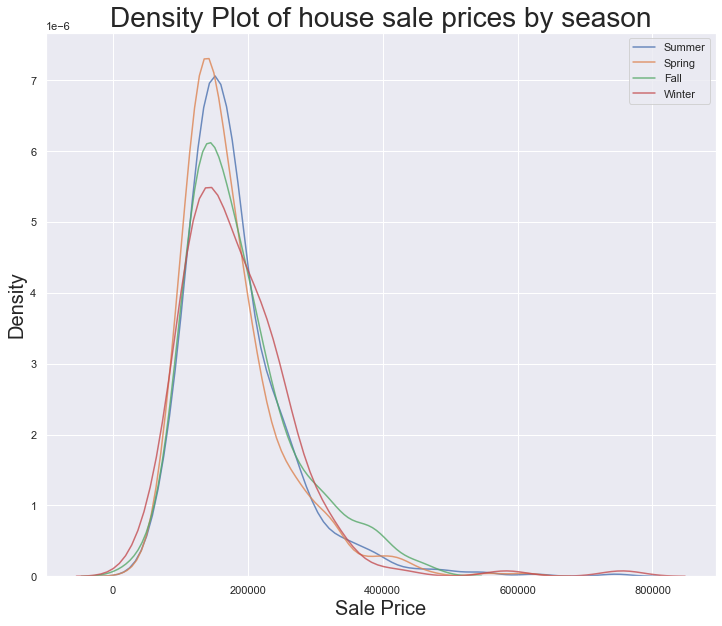

In [64]:
# Create a list of buildings 
types = cat_house_df['MoSold'].value_counts()
types= list(types.index)
# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the month
    subset = house_df[cat_house_df['MoSold'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by season', size = 28);

While the seasons had varying number of houses sold, they didn't affect the sale price of the house itself. It does make sense as Month isn't a feature one considers while buying a house!
I'm going to drop it from my feature list. 

 
       
let's look at the rest of the variables
'Neighborhood', 'Exterior2nd', 'MSSubClass' and 'Exterior1st', 

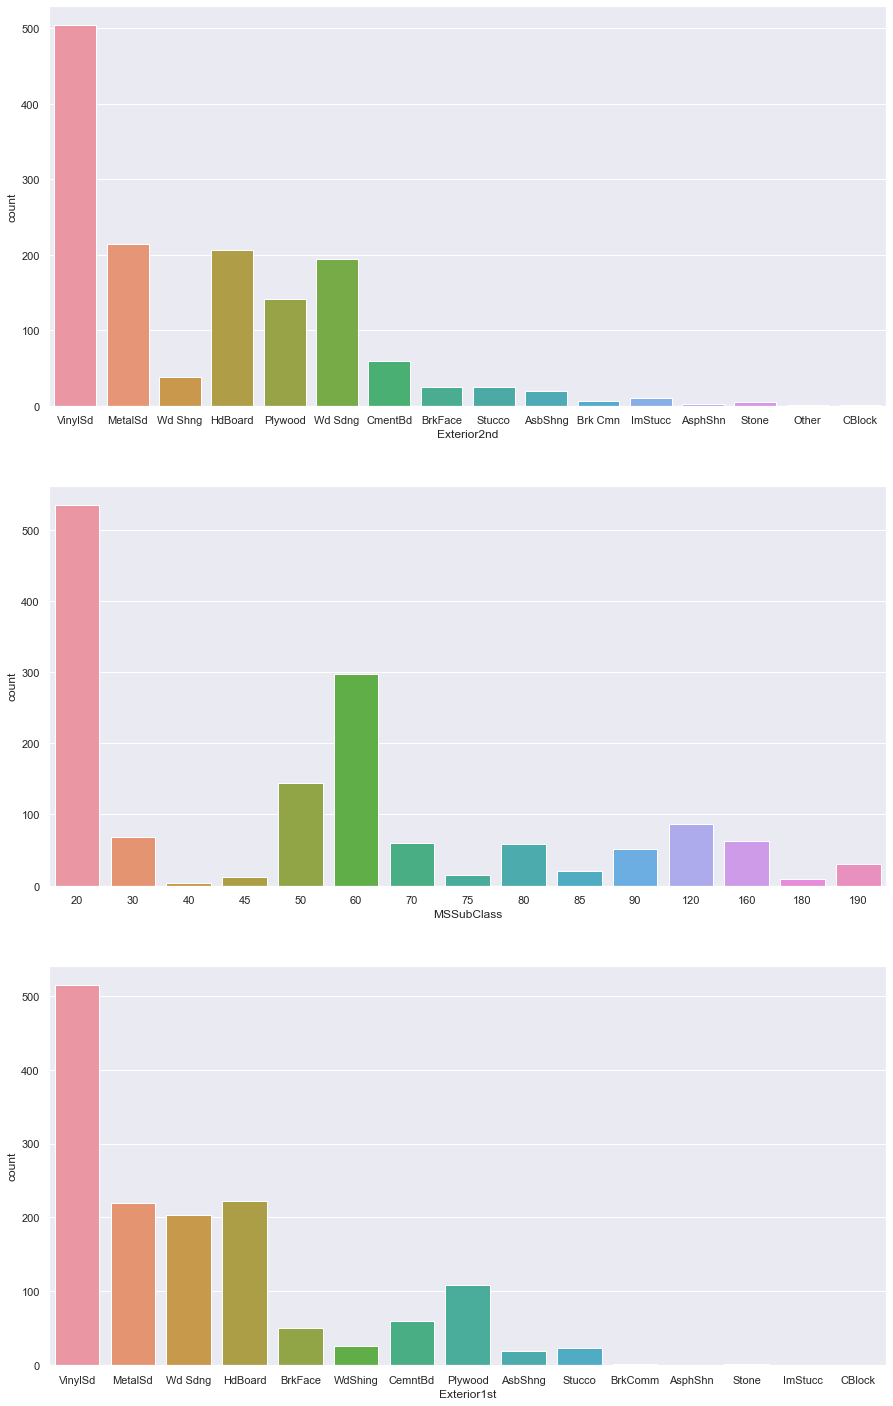

In [65]:
sns.set(rc={'figure.figsize':(15,25)})
fig, axes= plt.subplots(round(len(cat_unique_list_sort[1:4])),1, sharex=False)
for ax, feature in zip(fig.axes, cat_unique_list_sort[1:4].index):
  sns.countplot(house_df[feature],ax=ax)

		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
Exterior2nd: Exterior covering on house (if more than one material)

Most popular option for 1st exterior covering omn the house is vinyl sliding followed by metal,wood and hard board. The other options were used on 100 houses or less.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Majority of the houses are  type 20 followed by type 60. That is either 1 story or 2 story 1946 and newer style. The next popular ones are types 50,120, 30 80 and so on. However, we obtained similar information from the variable 'HouseStyle'. 

let's look at our last categorical variable: Neighborhood
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [66]:
house_df[cat_unique_list_sort.index[0]].value_counts()

NAmes      224
CollgCr    150
OldTown    112
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

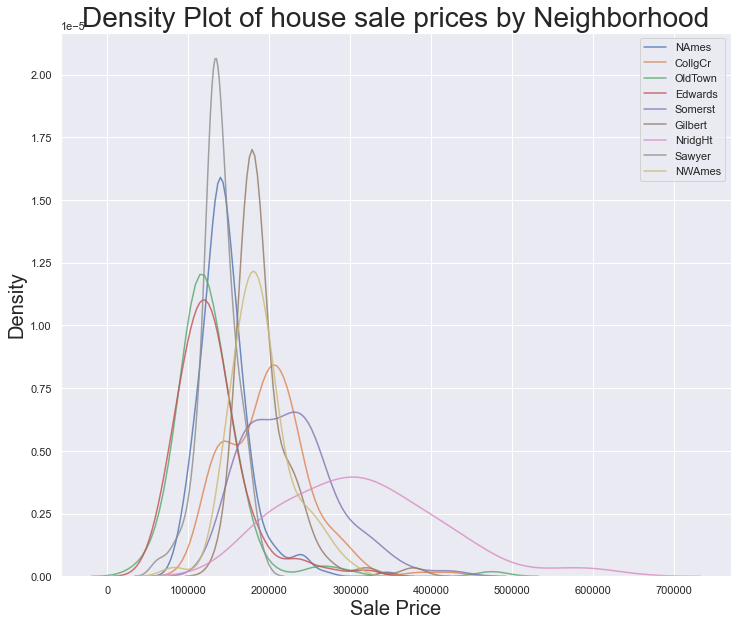

In [67]:
# Create a list of with more than 70 buildings 
types = cat_house_df['Neighborhood'].value_counts()
types= list(types[types.values > 70].index)
# Plot of distribution of sale prices for category labels
figsize(12, 10)

# Plot each building
for pd_type in types:
    # Select the neighborhood
    subset = house_df[cat_house_df['Neighborhood'] == pd_type]
    
    # Density plot of house sale prices
    sns.kdeplot(subset['SalePrice'].dropna(),
               label = pd_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Sale Price', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of house sale prices by Neighborhood', size = 28);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

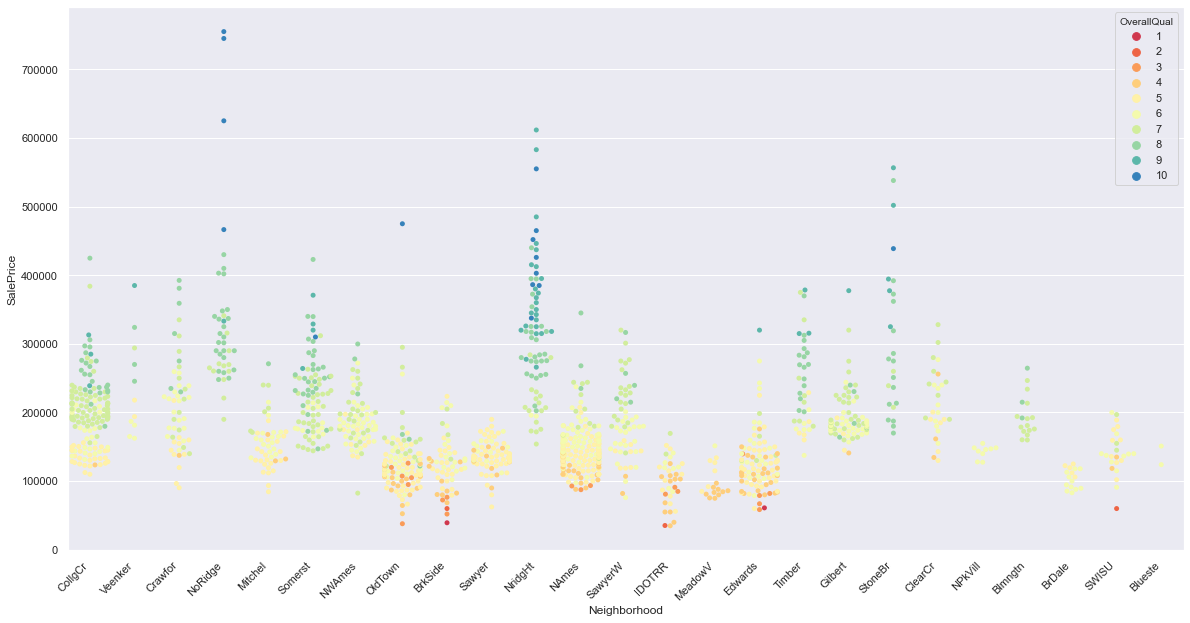

In [68]:

figsize(20,10)
sns.swarmplot(x= 'Neighborhood', y= 'SalePrice', hue= 'OverallQual', data= house_df, palette='Spectral')
plt.xticks(rotation=45,horizontalalignment='right')

Neighborhoods North Ridge, North Ridge heights and Stone Brook seem to have higher proportion of high quality houses compared to the rest. Neighborhoods such as Sawyer, Meadow Village, Northpark Villa, Briardale and Bluestem have medium quality houses and the rest have a mix. 

Only two houses of all the houses sold were from Bluestem and they happen to be of quality score 6. Nothing too suspicious. So,we move on. 

With this, we conclude our visualization of categorical variables.

To quickly summarize what we did under this section:
We listed our categorical variables and sorted them according to the number of unique labels in each. We then plotted respected count plots and density plots for a few features to see if the labels within a category affect our target variable- SalePrice. 

We also notice that in few variables, NA has been used to represent absence of certain feature. Therefore, we replace those instances with ‘No Garage’, ‘No Basement’  etc as suggested in the data description file. 

Although more number of houses are sold in months of May, June and July, our density plot shows that these months don’t affect the Sale price of the house. We also observe that the variable MSSubClass represents the same data as ‘HouseStyle’. We can drop both of these variables.

Next, we need to deal with rest of the missing values, if any and one-hot code the variables. 

In [69]:
len(cat_features_list)

41

In [0]:
cat_var_drop=['MSSubClass','MoSold', 'YrSold']

In [71]:
cat_features_list= set(cat_features_list)- set(cat_var_drop)
len(cat_features_list)

38

## Missing Values

In [72]:
cat_house_df.isna().sum().sort_values(ascending= False)

GarageCond       81
GarageQual       81
BsmtCond         37
MasVnrType        8
Electrical        1
Condition1        0
Exterior1st       0
RoofMatl          0
RoofStyle         0
HouseStyle        0
BldgType          0
Condition2        0
SaleCondition     0
Neighborhood      0
LandSlope         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
MSZoning          0
Exterior2nd       0
Foundation        0
ExterQual         0
ExterCond         0
YrSold            0
MoSold            0
PavedDrive        0
GarageFinish      0
GarageType        0
Functional        0
KitchenQual       0
CentralAir        0
HeatingQC         0
Heating           0
BsmtFinType2      0
BsmtFinType1      0
BsmtExposure      0
BsmtQual          0
SaleType          0
MSSubClass        0
dtype: int64

Looks like we missed replacing NA values for Basement condition, Garage quality and Garage Condition. These numbers are exactly as the same no. of missing values. And 8,1 missing values in Masonry Veneer Type and Electrical respectively. We fill it using the mode value.

In [73]:
cat_house_df['Electrical'].mode()

0    SBrkr
dtype: object

In [74]:
from statistics import mode
cat_house_df['Electrical'].fillna(cat_house_df['Electrical'].mode(), inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
cat_house_df['MasVnrType'].fillna(cat_house_df['MasVnrType'].mode(), inplace=True)

In [0]:
cat_house_df['BsmtCond'].fillna('No Basement', inplace=True)
cat_house_df['GarageQual'].fillna('No Garage', inplace=True)
cat_house_df['GarageCond'].fillna('No Garage', inplace=True)


In [77]:
house_df[num_features_list].isna().sum().sort_values(ascending= False)

MasVnrArea       8
FullBath         0
EnclosedPorch    0
BsmtUnfSF        0
TotalBsmtSF      0
YearRemodAdd     0
KitchenAbvGr     0
ScreenPorch      0
GrLivArea        0
LotArea          0
WoodDeckSF       0
GarageCars       0
YearBuilt        0
OpenPorchSF      0
HalfBath         0
LotFrontage      0
Fireplaces       0
BedroomAbvGr     0
SalePrice        0
OverallQual      0
BsmtFinSF1       0
dtype: int64

In [78]:
house_df['MasVnrArea'].mean()

102.8957182320442

In [0]:
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(), inplace=True)

Next, we one hot encode our remaining 38 features.
# Feature Engineering
Ideally, I'd want to this section to be feature engineering and selection, however, I have already chosen the most relevant features from my data through EDA earlier. 

All the same, feature engineering and selection is an iterative process and I will use the results of random forest to further pick my explanatory variables. 

For now, I will one hot encode my categorical variables and transform numerical variables as part of Feature Engineering section and then run random forest to identify important variables through feature importances.

In [0]:
# creating df with shortlisted variables post EDA
cat_feature_df= cat_house_df[cat_features_list]
num_feature_df= house_df[num_features_list]

We start with categorical  variables followed by numerical.

Let's get dummy variables for categorical features. For features with two unique variables, we can drop the first label and for the rest, we let the default option drop_first= False. 


In [162]:
two_list= ['Street','Utilities','CentralAir']
cat_transform_df= pd.DataFrame(index= house_df.index)
for feature in cat_feature_df.columns:
  if feature in l:
    two_dum= pd.get_dummies(cat_feature_df[feature], prefix=feature, drop_first=True)
    cat_transform_df= pd.concat([cat_transform_df,two_dum ], axis=1)
    
  else:
    n_dum= pd.get_dummies(cat_feature_df[feature], prefix=feature)
    cat_transform_df= pd.concat([cat_transform_df, n_dum ], axis=1)
cat_transform_df

SaleType_COD  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
Id                                                               
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
5                0             0             0               0   
...            ...           ...           ...             ...   
1456             0             0             0               0   
1457             0             0             0               0   
1458             0             0             0               0   
1459             0             0             0               0   
1460             0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                                              
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
5                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   
1460               0               0             0             0            1   

      LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  Street_Pave  \
Id                                                                          
1                0             0             0             1            1   
2                0             0             0             1            1   
3                1             0             0             0            1   
4                1             0             0             0            1   
5                1             0             0             0            1   
...            ...           ...           ...           ...          ...   
1456             0             0             0             1            1   
1457             0             0             0             1            1   
1458             0             0             0             1            1   
1459             0             0             0             1            1   
1460             0             0             0             1            1   

      Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
Id                                                                            
1                     0                 0                1                0   
2                     0                 1                0                0   
3                     0                 0                1                0   
4                     0                 0                1                0   
5                     0                 0                1                0   
...                 ...               ...              ...              ...   
1456                  0                 0                1                0   
1457                  0                 0                1                0   
1458                  0                 0                1                0   
1459                  0                 0                1                0   
1460                  0                 0                1                0   

      Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condit

In [81]:
num_feature_df.isna().sum()

BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
YearRemodAdd     0
KitchenAbvGr     0
ScreenPorch      0
GrLivArea        0
LotArea          0
WoodDeckSF       0
EnclosedPorch    0
GarageCars       0
OpenPorchSF      0
MasVnrArea       0
HalfBath         0
LotFrontage      0
Fireplaces       0
BedroomAbvGr     0
SalePrice        0
OverallQual      0
YearBuilt        0
FullBath         0
dtype: int64

In [89]:
from scipy.stats import skew
# check skewness in our numerical features before applying box cox transformation
skew_features= num_feature_df.apply(lambda x: skew(x))b
skew_features.sort_values(ascending= False)

LotArea          12.593590
KitchenAbvGr      4.476748
ScreenPorch       4.111400
EnclosedPorch     3.081275
MasVnrArea        2.690263
OpenPorchSF       2.227323
SalePrice         1.886506
WoodDeckSF        1.542986
GrLivArea         1.012836
BsmtUnfSF         0.921676
LotFrontage       0.768959
BsmtFinSF1        0.762849
HalfBath          0.680339
Fireplaces        0.633644
TotalBsmtSF       0.511115
BedroomAbvGr      0.213745
OverallQual       0.193413
FullBath          0.025826
GarageCars       -0.340611
YearRemodAdd     -0.499250
YearBuilt        -0.609652
dtype: float64

[As a general rule of thumb:](https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis) If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

So, we apply box cox transformation to variables whose absolute value of sknewness is above 0.65 

This transformation technique helps make our data more normally distributed. We need to estimate lambda from our training set. The value of lambda usually lies between -5 and 5 and controls the type of transformation

[Below are some common values for lambda](https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/)

* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

In order to find an appropirate value for lambda, I tried to calculate for ones with postive features values( > 0). I need to apply boxccox1p for data contaning zeroes, otherwise, it throws me an error. I'm sure there are better ways, I'm yet to learn them. 

In [141]:
feature= 'LotArea'
df[feature], lam = boxcox(house_df[feature])
print(lam)

0.041025683092740524


In [140]:
feature= 'GrLivArea'
df[feature], lam = boxcox(house_df[feature])
print(lam)

0.07057474598951416


I am choosing my lambda value to be close to 0. And since it is a log transformation, I transform my target variable 'SalePrice' too. 

In [135]:
# Shortlist variables for box cox transformation
skew_features_shortlist= skew_features[abs(skew_features) > 0.65]
print('There are {} variables for Box Cox Transformation'.format(len(skew_features_shortlist)))

There are 13 variables for Box Cox Transformation


In [168]:
num_transform_df= pd.DataFrame(index= house_df.index)
from scipy.stats import boxcox
lam= 0.1
for feature in num_feature_df.columns:
  if feature in skew_features_shortlist.index:
    num_transform_df[feature] = boxcox1p(num_feature_df[feature], lam )
  else:
    num_transform_df[feature]= num_feature_df[feature]

num_transform_df


BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  YearRemodAdd  KitchenAbvGr  \
Id                                                                     
1       9.272672   6.515727          856          2003      0.717735   
2       9.910321   7.598858         1262          1976      0.717735   
3       8.567477   8.358996          920          2002      0.717735   
4       7.125607   8.763754          756          1970      0.717735   
5       9.128917   8.582671         1145          2000      0.717735   
...          ...        ...          ...           ...           ...   
1456    0.000000   9.858884          953          2000      0.717735   
1457    9.490261   8.927149         1542          1988      0.717735   
1458    7.542477   9.694704         1152          2006      0.717735   
1459    4.787576   0.000000         1078          1996      0.717735   
1460    9.586647   6.355810         1256          1965      0.717735   

      ScreenPorch  GrLivArea    LotArea  WoodDeckSF  EnclosedPorch  \
Id                                                                   
1             0.0  11.053534  14.699651    0.000000       0.000000   
2             0.0  10.423978  15.016794    7.683455       0.000000   
3             0.0  11.145232  15.416697    0.000000       0.000000   
4             0.0  11.062131  15.003735    0.000000       7.523315   
5             0.0  11.588503  16.026454    6.926054       0.000000   
...           ...        ...        ...         ...            ...   
1456          0.0  10.974698  14.539265    0.000000       0.000000   
1457          0.0  11.462528  15.821315    7.964155       0.000000   
1458          0.0  11.724017  14.867450    0.000000       0.000000   
1459          0.0  10.104911  15.047114    8.049559       6.043822   
1460          0.0  10.414255  15.103247    9.352931       0.000000   

      GarageCars  OpenPorchSF  MasVnrArea  HalfBath  LotFrontage  Fireplaces  \
Id                                                                             
1              2     5.109120    6.960811  0.717735     5.203879           0   
2              2     0.000000    0.000000  0.000000     5.518456           1   
3              2     4.566219    6.642507  0.717735     5.271613           1   
4              3     4.309691    0.000000  0.000000     5.084572           1   
5              3     5.593439    7.969281  0.717735     5.593439           1   
...          ...          ...         ...       ...          ...         ...   
1456           2     4.497008    0.000000  0.717735     5.133314           1   
1457           2     0.000000    6.140542  0.000000     5.611687           2   
1458           1     5.084572    0.000000  0.000000     5.226759           2   
1459           1     0.000000    0.000000  0.000000     5.271613           0   
1460           1     5.271613    0.000000  0.717735     5.419893           0   

      BedroomAbvGr  SalePrice  OverallQual  YearBuilt  FullBath  
Id                                                               
1                3  24.033829            7       2003         2  
2                3  23.565097            6       1976         2  
3                3  24.271092            7       2001         2  
4                3  22.704922            7       1915         1  
5                4  24.657256            8       2000         2  
...            ...        ...          ...        ...       ...  
1456             3  23.442909            6       1999         2  
1457             3  24.058235            6       1978         2  
1458             4  24.879471            7       1941         2  
1459             2  22.754227            5       1950         1  
1460             3  22.876040            5       1965         1  

[1456 rows x 21 columns]

Let's combine the numerical and categorical features into one dataframe

In [170]:
train_df= pd.concat([num_transform_df, cat_transform_df], axis=1)
train_df

BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  YearRemodAdd  KitchenAbvGr  \
Id                                                                     
1       9.272672   6.515727          856          2003      0.717735   
2       9.910321   7.598858         1262          1976      0.717735   
3       8.567477   8.358996          920          2002      0.717735   
4       7.125607   8.763754          756          1970      0.717735   
5       9.128917   8.582671         1145          2000      0.717735   
...          ...        ...          ...           ...           ...   
1456    0.000000   9.858884          953          2000      0.717735   
1457    9.490261   8.927149         1542          1988      0.717735   
1458    7.542477   9.694704         1152          2006      0.717735   
1459    4.787576   0.000000         1078          1996      0.717735   
1460    9.586647   6.355810         1256          1965      0.717735   

      ScreenPorch  GrLivArea    LotArea  WoodDeckSF  EnclosedPorch  \
Id                                                                   
1             0.0  11.053534  14.699651    0.000000       0.000000   
2             0.0  10.423978  15.016794    7.683455       0.000000   
3             0.0  11.145232  15.416697    0.000000       0.000000   
4             0.0  11.062131  15.003735    0.000000       7.523315   
5             0.0  11.588503  16.026454    6.926054       0.000000   
...           ...        ...        ...         ...            ...   
1456          0.0  10.974698  14.539265    0.000000       0.000000   
1457          0.0  11.462528  15.821315    7.964155       0.000000   
1458          0.0  11.724017  14.867450    0.000000       0.000000   
1459          0.0  10.104911  15.047114    8.049559       6.043822   
1460          0.0  10.414255  15.103247    9.352931       0.000000   

      GarageCars  OpenPorchSF  MasVnrArea  HalfBath  LotFrontage  Fireplaces  \
Id                                                                             
1              2     5.109120    6.960811  0.717735     5.203879           0   
2              2     0.000000    0.000000  0.000000     5.518456           1   
3              2     4.566219    6.642507  0.717735     5.271613           1   
4              3     4.309691    0.000000  0.000000     5.084572           1   
5              3     5.593439    7.969281  0.717735     5.593439           1   
...          ...          ...         ...       ...          ...         ...   
1456           2     4.497008    0.000000  0.717735     5.133314           1   
1457           2     0.000000    6.140542  0.000000     5.611687           2   
1458           1     5.084572    0.000000  0.000000     5.226759           2   
1459           1     0.000000    0.000000  0.000000     5.271613           0   
1460           1     5.271613    0.000000  0.717735     5.419893           0   

      BedroomAbvGr  SalePrice  OverallQual  YearBuilt  FullBath  SaleType_COD  \
Id                                                                              
1                3  24.033829            7       2003         2             0   
2                3  23.565097            6       1976         2             0   
3                3  24.271092            7       2001         2             0   
4                3  22.704922            7       1915         1             0   
5                4  24.657256            8       2000         2             0   
...            ...        ...          ...        ...       ...           ...   
1456             3  23.442909            6       1999         2             0   
1457             3  24.058235            6       1978         2             0   
1458             4  24.879471            7       1941         2             0   
1459             2  22.754227            5       1950         1             0   
1460             3  22.876040            5       1965         1             0   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConL

In [173]:
train_df.shape

(1456, 259)

Let's save our dataset to be used for the following steps

In [0]:
train_df.to_csv('house_train_df.csv', index=False)

# Conclusion

In this notebook, we 
* cleaned and formatted raw data
* Performed Exploratory Data Analysis
* Shortlisted variables to be used for model training 

In the next notebook, we will establish a baseline model, implement several ML methods, optimize them using hyperparameter tuning and cross validation. 